### **Loading dataset**

In [6]:
import pandas as pd

df = pd.read_excel('/Users/adithya/Desktop/files/raceway1.xlsx')

In [7]:
# Print column names
print(df.columns)

# Print first few rows of the DataFrame
print(df.head())


Index(['irradiance', 'Unnamed: 1', 'temperature', 'Unnamed: 3', 'pH',
       'Unnamed: 5', 'oxygen', 'Unnamed: 7', 'nitrate', 'Unnamed: 9',
       'phosphate', 'Unnamed: 11', 'chlorophyll-a', 'Unnamed: 13', 'density',
       'Unnamed: 15', 'salinity', 'Unnamed: 17'],
      dtype='object')
  irradiance Unnamed: 1 temperature Unnamed: 3        pH Unnamed: 5    oxygen  \
0   time_num       data    time_num       data  time_num       data  time_num   
1          0     0.0025           0     17.653         1       9.41         0   
2     0.0035     0.0026      0.0035     17.629         2       9.39         1   
3     0.0069     0.0026      0.0069     17.582         3        9.4         2   
4     0.0104     0.0026      0.0104     17.558         4       9.38         3   

  Unnamed: 7   nitrate Unnamed: 9 phosphate Unnamed: 11 chlorophyll-a  \
0       data  time_num       data  time_num        data      time_num   
1        326         1    35.0187         1      1.8087             1   
2   

In [ ]:
df.head()

irradiance Unnamed: 1 temperature Unnamed: 3        pH Unnamed: 5    oxygen  \
0   time_num       data    time_num       data  time_num       data  time_num   
1          0     0.0025           0     17.653         1       9.41         0   
2     0.0035     0.0026      0.0035     17.629         2       9.39         1   
3     0.0069     0.0026      0.0069     17.582         3        9.4         2   
4     0.0104     0.0026      0.0104     17.558         4       9.38         3   

  Unnamed: 7   nitrate Unnamed: 9 phosphate Unnamed: 11 chlorophyll-a  \
0       data  time_num       data  time_num        data      time_num   
1        326         1    35.0187         1      1.8087             1   
2        274         2    34.3091         8       1.341             2   
3        317         3    34.7791        15       1.645             3   
4        296         4    34.9989        22      2.2951             4   

  Unnamed: 13   density Unnamed: 15  salinity Unnamed: 17  
0        data  time_num        data  time_num        data  
1      0.0074         1       0.007         1          12  
2       0.007         2       0.006         2          10  
3      0.0103         3       0.005         3          13  
4      0.0067         4      0.0077         4          10

# **Data Resampling**

In [8]:
# Assuming df is your original DataFrame containing the data
# Extract data for nitrate, salinity, and time columns
irradiance_data = {'time': df.iloc[2:, 0].astype(float), 'irradiance': df.iloc[2:, 1].astype(float)}
temperature_data = {'time': df.iloc[2:, 2].astype(float), 'temperature': df.iloc[2:, 3].astype(float)}
ph_data = {'time': df.iloc[2:, 4].astype(float), 'pH': df.iloc[2:, 5].astype(float)}
oxygen_data = {'time': df.iloc[2:, 6].astype(float), 'oxygen': df.iloc[2:, 7].astype(float)}
nitrate_data = {'time': df.iloc[2:, 8].astype(float), 'nitrate': df.iloc[2:, 9].astype(float)}
phosphate_data = {'time': df.iloc[2:, 10].astype(float), 'phosphate': df.iloc[2:, 11].astype(float)}
chlorophylla_data = {'time': df.iloc[2:, 12].astype(float), 'chlorophyll-a': df.iloc[2:, 13].astype(float)}
salinity_data = {'time': df.iloc[2:, 16].astype(float), 'salinity': df.iloc[2:, 17].astype(float)}
density_data = {'time': df.iloc[2:, 14].astype(float), 'density': df.iloc[2:, 15].astype(float)}

# Create pandas DataFrames
df_irradiance = pd.DataFrame(irradiance_data)
df_temperature = pd.DataFrame(temperature_data)
df_ph = pd.DataFrame(ph_data)
df_oxygen = pd.DataFrame(oxygen_data)
df_nitrate = pd.DataFrame(nitrate_data)
df_phosphate = pd.DataFrame(phosphate_data)
df_chlorophylla = pd.DataFrame(chlorophylla_data)
df_salinity = pd.DataFrame(salinity_data)
df_density = pd.DataFrame(density_data)

# Remove duplicates from time index
df_irradiance_unique = df_irradiance.drop_duplicates(subset=['time'])
df_temperature_unique = df_temperature.drop_duplicates(subset=['time'])
df_ph_unique = df_ph.drop_duplicates(subset=['time'])
df_oxygen_unique = df_oxygen.drop_duplicates(subset=['time'])
df_nitrate_unique = df_nitrate.drop_duplicates(subset=['time'])
df_phosphate_unique = df_phosphate.drop_duplicates(subset=['time'])
df_chlorophylla_unique = df_chlorophylla.drop_duplicates(subset=['time'])
df_salinity_unique = df_salinity.drop_duplicates(subset=['time'])
df_density_unique = df_density.drop_duplicates(subset=['time'])

# Create a new DataFrame with the common time index (1-260 days)
common_time_index = pd.DataFrame(index=range(1, 261))

# resample nitrate data
df_irradiance_resampled = df_irradiance_unique.set_index('time').reindex(common_time_index.index).interpolate(method='linear')
df_temperature_resampled = df_temperature_unique.set_index('time').reindex(common_time_index.index).interpolate(method='linear')
df_ph_resampled = df_ph_unique.set_index('time').reindex(common_time_index.index).interpolate(method='linear')
df_oxygen_resampled = df_oxygen_unique.set_index('time').reindex(common_time_index.index).interpolate(method='linear')
df_nitrate_resampled = df_nitrate_unique.set_index('time').reindex(common_time_index.index).interpolate(method='linear')
df_phosphate_resampled = df_phosphate_unique.set_index('time').reindex(common_time_index.index).interpolate(method='linear')
df_chlorophylla_resampled = df_chlorophylla_unique.set_index('time').reindex(common_time_index.index).interpolate(method='linear')
df_salinity_resampled = df_salinity_unique.set_index('time').reindex(common_time_index.index).interpolate(method='linear')
df_density_resampled = df_density_unique.set_index('time').reindex(common_time_index.index).interpolate(method='linear')

In [9]:
print(df_density_resampled)
print(df_nitrate_resampled)
print(df_salinity_resampled)
print(df_ph_resampled)
print(df_phosphate_resampled)


# Align the indexes first if they are not aligned
df_irradiance_resampled.index = range(1, len(df_density_resampled) + 1)
df_temperature_resampled.index = range(1, len(df_density_resampled) + 1)
df_ph_resampled.index = range(1, len(df_density_resampled) + 1)
df_oxygen_resampled.index = range(1, len(df_density_resampled) + 1)
df_phosphate_resampled.index = range(1, len(df_density_resampled) + 1)
df_chlorophylla_resampled.index = range(1, len(df_density_resampled) + 1)
df_density_resampled.index = range(1, len(df_density_resampled) + 1)
df_nitrate_resampled.index = range(1, len(df_nitrate_resampled) + 1)
df_salinity_resampled.index = range(1, len(df_salinity_resampled) + 1)

# Applying backward fill to handle initial NaN values in each resampled dataframe
df_irradiance_resampled.fillna(method='bfill', inplace=True)
df_temperature_resampled.fillna(method='bfill', inplace=True)
df_ph_resampled.fillna(method='bfill', inplace=True)
df_oxygen_resampled.fillna(method='bfill', inplace=True)
df_nitrate_resampled.fillna(method='bfill', inplace=True)
df_phosphate_resampled.fillna(method='bfill', inplace=True)
df_chlorophylla_resampled.fillna(method='bfill', inplace=True)
df_density_resampled.fillna(method='bfill', inplace=True)
df_salinity_resampled.fillna(method='bfill', inplace=True)

# Combine the DataFrames
df_combined = pd.concat([df_density_resampled, df_nitrate_resampled, df_salinity_resampled,
                         df_irradiance_resampled, df_temperature_resampled, df_ph_resampled,
                         df_oxygen_resampled, df_phosphate_resampled, df_chlorophylla_resampled], axis=1)

# Save the combined DataFrame to a CSV file
df_combined.to_csv('resampled_data.csv', index=False)


      density
1         NaN
2    0.006000
3    0.005000
4    0.007700
5    0.009133
..        ...
256  1.324286
257  1.345714
258  1.367143
259  1.388571
260  1.410000

[260 rows x 1 columns]
       nitrate
1          NaN
2    34.309100
3    34.779100
4    34.998900
5    34.672567
..         ...
256  22.833800
257  22.833800
258  22.833800
259  22.833800
260  22.833800

[260 rows x 1 columns]
      salinity
1          NaN
2    10.000000
3    13.000000
4    10.000000
5    11.333333
..         ...
256  14.142857
257  14.857143
258  15.571429
259  16.285714
260  17.000000

[260 rows x 1 columns]
           pH
1         NaN
2    9.390000
3    9.400000
4    9.380000
5    9.376667
..        ...
256  9.712857
257  9.707143
258  9.701429
259  9.695714
260  9.690000

[260 rows x 1 columns]
     phosphate
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
..         ...
256     1.3035
257     1.3035
258     1.3035
259     1.3035
260     1.3035

[260 rows x 1 columns]


/var/folders/xb/jjrdwhjd01g1f8bh8nb7fzyh0000gn/T/ipykernel_97567/1107326401.py:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_irradiance_resampled.fillna(method='bfill', inplace=True)
/var/folders/xb/jjrdwhjd01g1f8bh8nb7fzyh0000gn/T/ipykernel_97567/1107326401.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_temperature_resampled.fillna(method='bfill', inplace=True)
/var/folders/xb/jjrdwhjd01g1f8bh8nb7fzyh0000gn/T/ipykernel_97567/1107326401.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ph_resampled.fillna(method='bfill', inplace=True)
/var/folders/xb/jjrdwhjd01g1f8bh8nb7fzyh0000gn/T/ipykernel_97567/1107326401.py:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in 

# **Data Augmentation**

In [10]:
def load_dataset(file_path):
    # Load the dataset using Pandas
    df = pd.read_csv(file_path)
    return df

1. DATA INTERPOLATION

In [11]:
import numpy as np

#USING INTERPOLATION TECHNIQUE

def augment_data(X_train, desired_num_samples, decimal_places=4):
    # Calculate the number of samples to generate
    num_generated_samples = desired_num_samples - len(X_train)
    # Generate synthetic data by random sampling and interpolation
    synthetic_data = []
    for _ in range(num_generated_samples):
        # Randomly select two samples from the original dataset
        sample1 = X_train[np.random.randint(0, len(X_train))]
        sample2 = X_train[np.random.randint(0, len(X_train))]
        # Interpolate between the two samples to generate a new synthetic sample
        synthetic_sample = sample1 + np.random.rand() * (sample2 - sample1)
        # Round the synthetic sample to the specified number of decimal places
        synthetic_sample = np.around(synthetic_sample, decimal_places)
        synthetic_data.append(synthetic_sample)
    # Convert the synthetic data to a numpy array
    synthetic_data = np.array(synthetic_data)
    # Concatenate the original dataset with the synthetic data
    return np.concatenate((X_train, synthetic_data), axis=0)

# File path to your dataset
file_path = '/Users/adithya/Desktop/files/resampled_data.csv'

# Load your dataset
dataset = load_dataset(file_path)
feature_names = dataset.columns.tolist()  # Get column names here

# Get the number of samples before augmentation
num_samples_before = len(dataset)

# Define the desired number of samples you want to generate
desired_num_samples = 20000

# Convert the DataFrame to a NumPy array for augmentation
X_train = dataset.values

# Augment the dataset with limited decimal places
augmented_data = augment_data(X_train, desired_num_samples, decimal_places=4)

# Convert numpy array to DataFrame
augmented_df = pd.DataFrame(augmented_data, columns=["density", "nitrate", "salinity", "irradiance", "temperature", "ph", "oxygen", "phosphate", "chlorophyll"])

# Save augmented data to CSV
augmented_df.to_csv('new_data.csv', index=False)

# **Relationship b/w density and other features**

In [28]:
import pandas as pd

df = pd.read_csv('/Users/adithya/Desktop/files/new_data.csv')

In [29]:
# Print column names
print(df.columns)

# Print first few rows of the DataFrame
print(df.head())

Index(['density', 'nitrate', 'salinity', 'irradiance', 'temperature', 'ph',
       'oxygen', 'phosphate', 'chlorophyll'],
      dtype='object')
    density    nitrate   salinity  irradiance  temperature        ph  oxygen  \
0  0.006000  34.309100  10.000000    0.002200       16.654  9.390000   274.0   
1  0.006000  34.309100  10.000000    0.001000       16.201  9.390000   317.0   
2  0.005000  34.779100  13.000000    0.000345       17.629  9.400000   296.0   
3  0.007700  34.998900  10.000000   -0.000426       16.534  9.380000   309.0   
4  0.009133  34.672567  11.333333    0.002000       16.963  9.376667   307.0   

   phosphate  chlorophyll  
0      1.341       0.0070  
1      1.341       0.0070  
2      1.341       0.0103  
3      1.341       0.0067  
4      1.341       0.0077  


In [30]:
selected_columns_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8]  # Adjusting column indices to start from 0
df_selected = df.iloc[1:, selected_columns_indices]

# Creating separate dataframes for each column if needed
density_data = pd.DataFrame({"Column 5 Data": df.iloc[1:, 0].astype(float)})
nitrate_data = pd.DataFrame({"Column 8 Data": df.iloc[1:, 1].astype(float)})
salinity_data = pd.DataFrame({"Column 7 Data": df.iloc[1:, 2].astype(float)})
irradiance_data = pd.DataFrame({"Column 7 Data": df.iloc[1:, 3].astype(float)})
temperature_data = pd.DataFrame({"Column 7 Data": df.iloc[1:, 4].astype(float)})
ph_data = pd.DataFrame({"Column 7 Data": df.iloc[1:, 5].astype(float)})
oxygen_data = pd.DataFrame({"Column 7 Data": df.iloc[1:, 6].astype(float)})
phosphate_data = pd.DataFrame({"Column 7 Data": df.iloc[1:, 7].astype(float)})
chlorophyll_data = pd.DataFrame({"Column 7 Data": df.iloc[1:, 8].astype(float)})

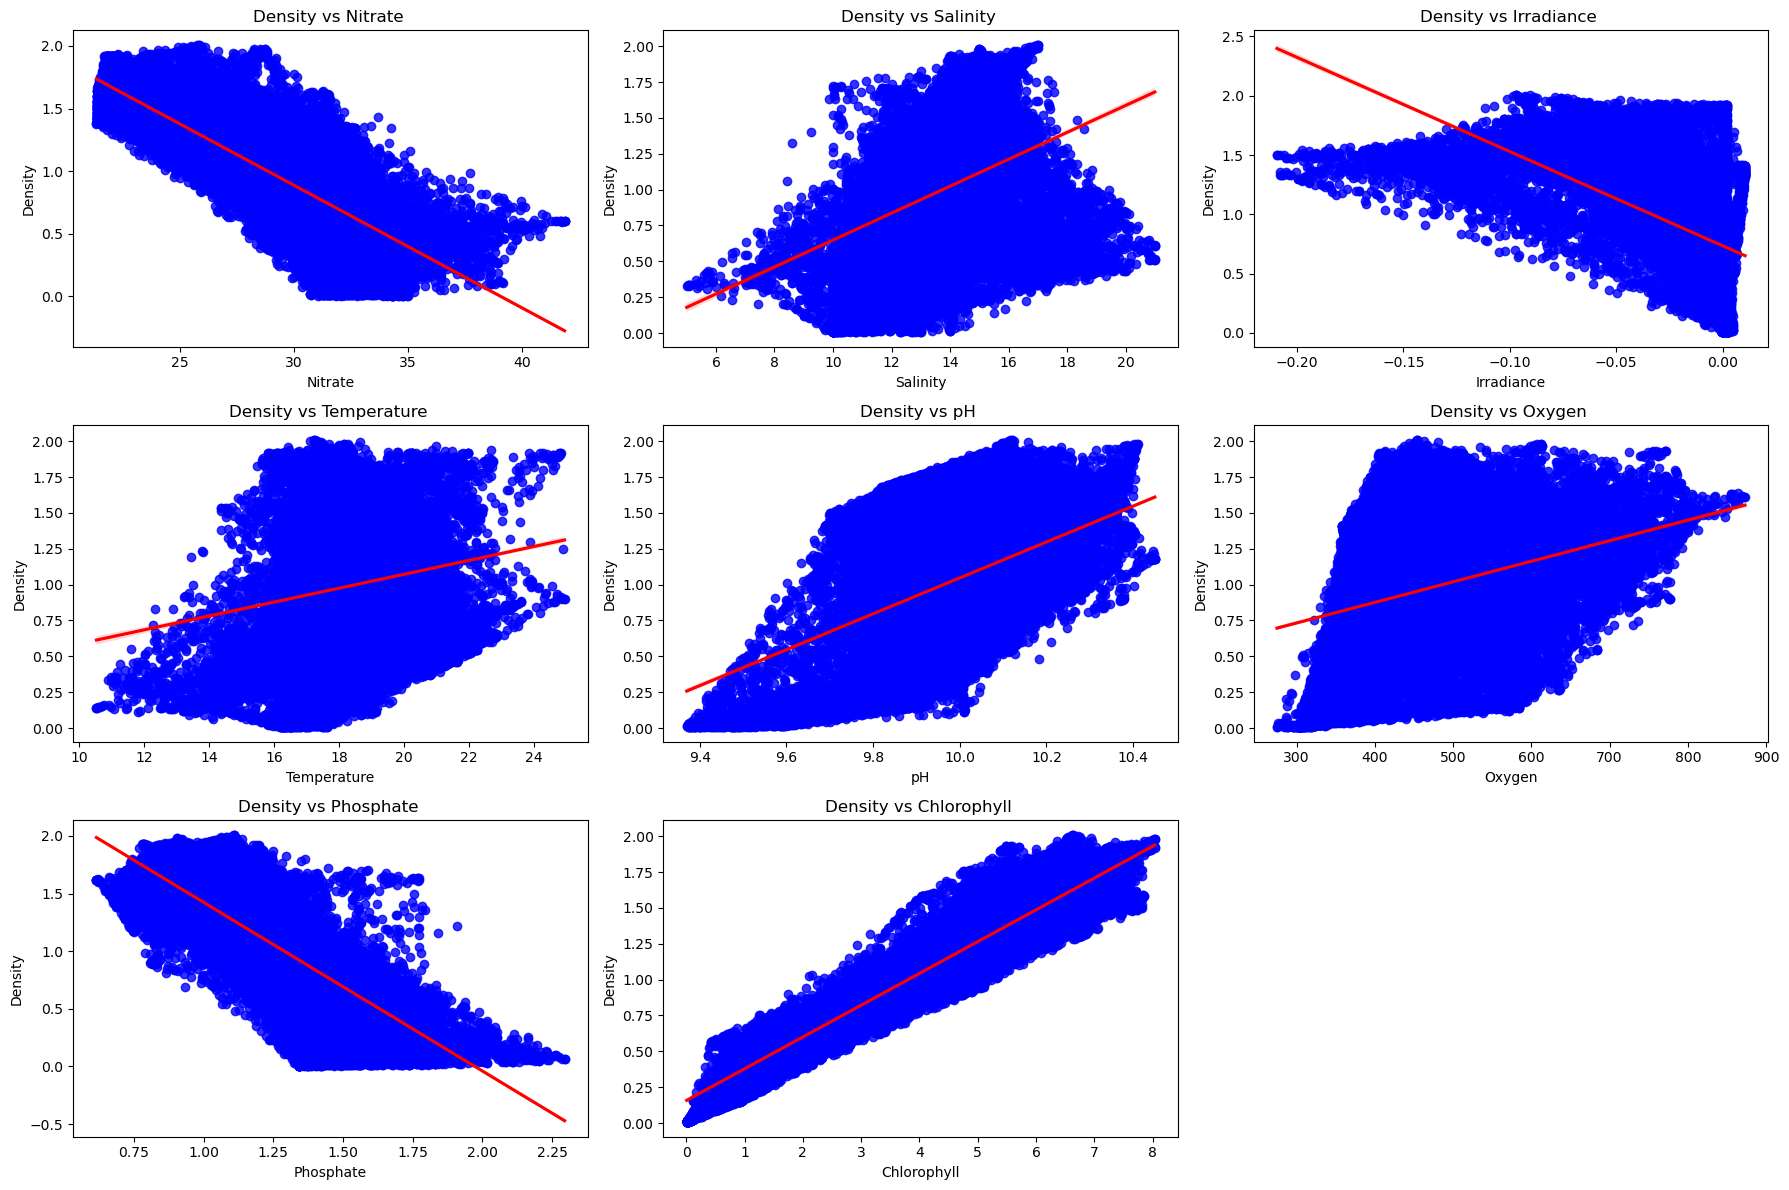

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Assuming you have a main DataFrame called 'df'
# Data preparation with corrected DataFrame creation
df = pd.DataFrame({
    "Density": df.iloc[1:, 0].astype(float),
    "Nitrate": df.iloc[1:, 1].astype(float),
    "Salinity": df.iloc[1:, 2].astype(float),
    "Irradiance": df.iloc[1:, 3].astype(float),
    "Temperature": df.iloc[1:, 4].astype(float),
    "pH": df.iloc[1:, 5].astype(float),
    "Oxygen": df.iloc[1:, 6].astype(float),
    "Phosphate": df.iloc[1:, 7].astype(float),
    "Chlorophyll": df.iloc[1:, 8].astype(float)
})

# Now create scatter plots with regression lines
features = ['Nitrate', 'Salinity', 'Irradiance', 'Temperature', 'pH', 'Oxygen', 'Phosphate', 'Chlorophyll']
plt.figure(figsize=(18, 12))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)  # Adjust subplot layout for the number of features
    sns.regplot(x=feature, y='Density', data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
    plt.title(f'Density vs {feature} ')
    plt.xlabel(feature)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()


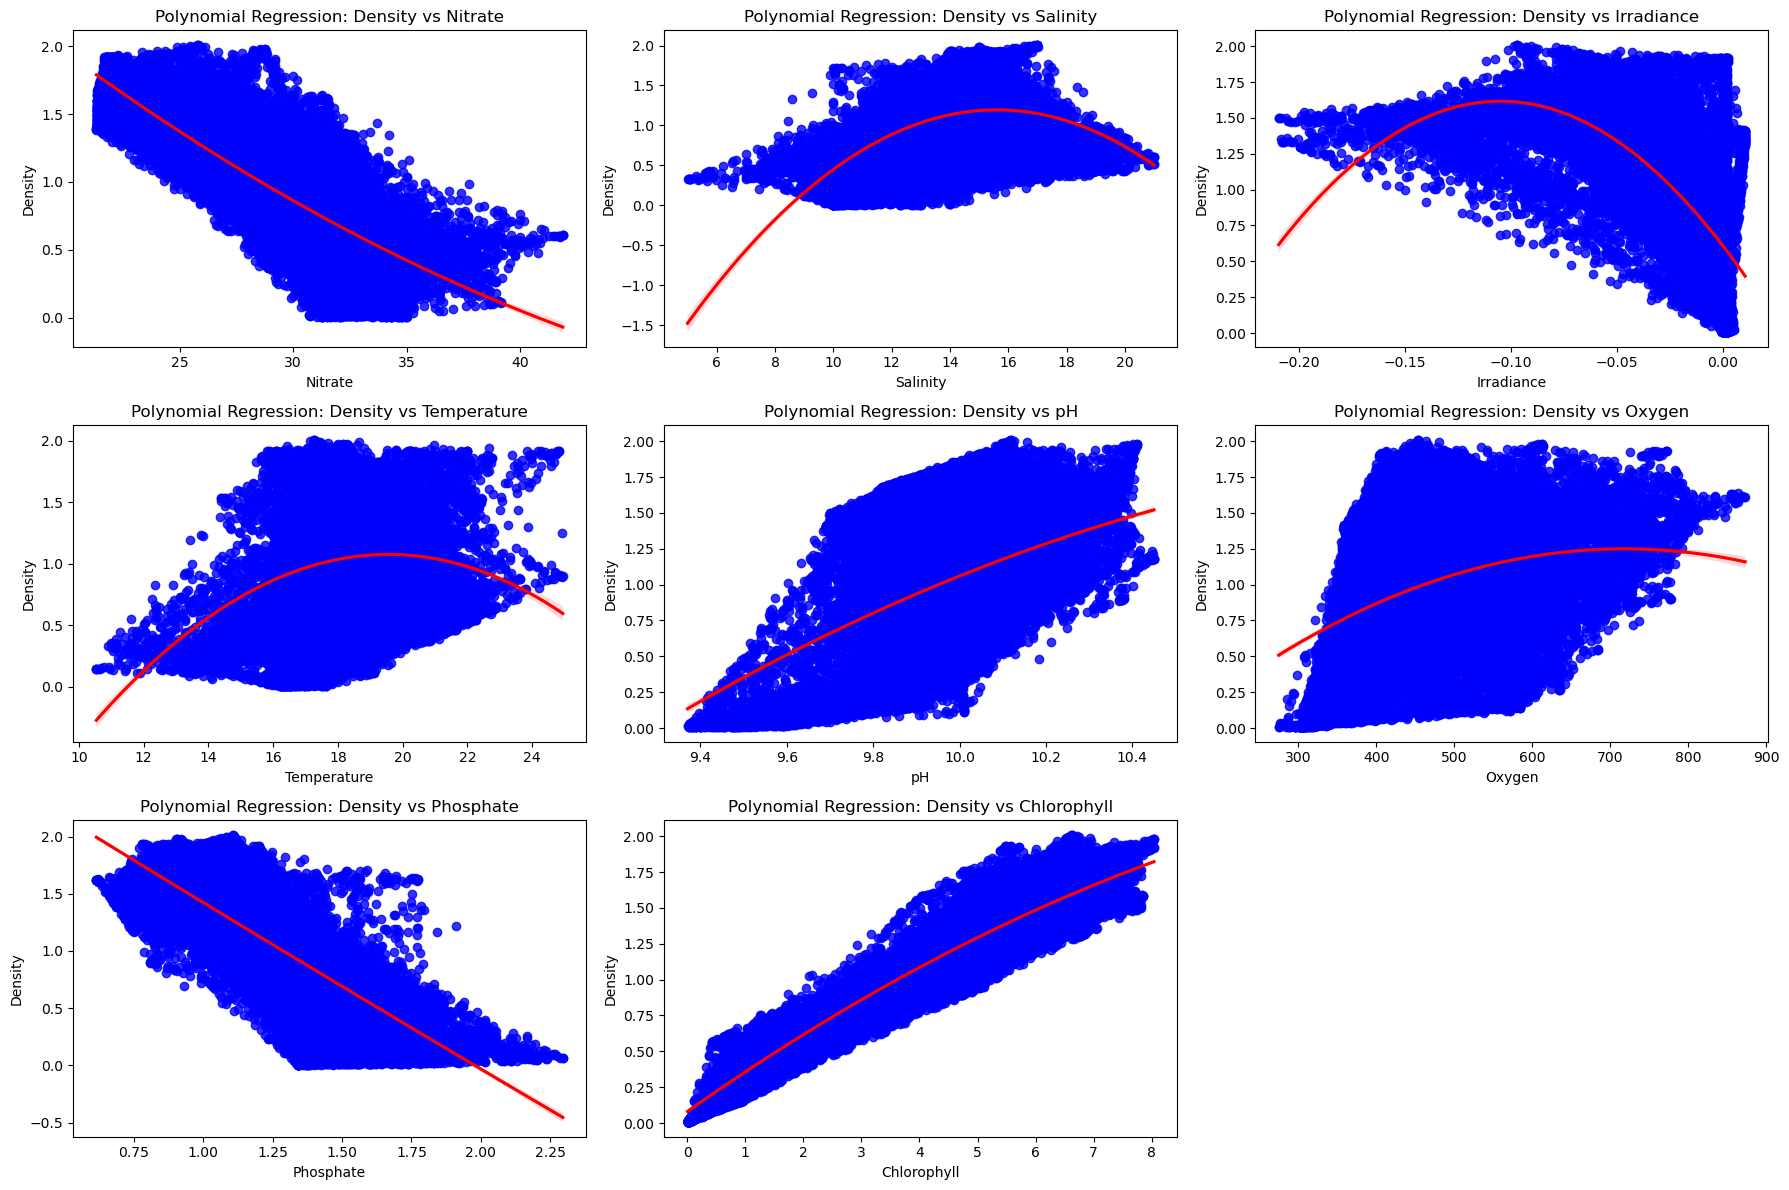

In [32]:
import numpy as np
import seaborn as sns

# Function to plot polynomial regression lines
plt.figure(figsize=(18, 12))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.regplot(
        x=feature, y='Density', data=df, order=2,  # Order=2 adds a polynomial fit
        scatter_kws={"color": "blue"}, line_kws={"color": "red"}
    )
    plt.title(f'Polynomial Regression: Density vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()


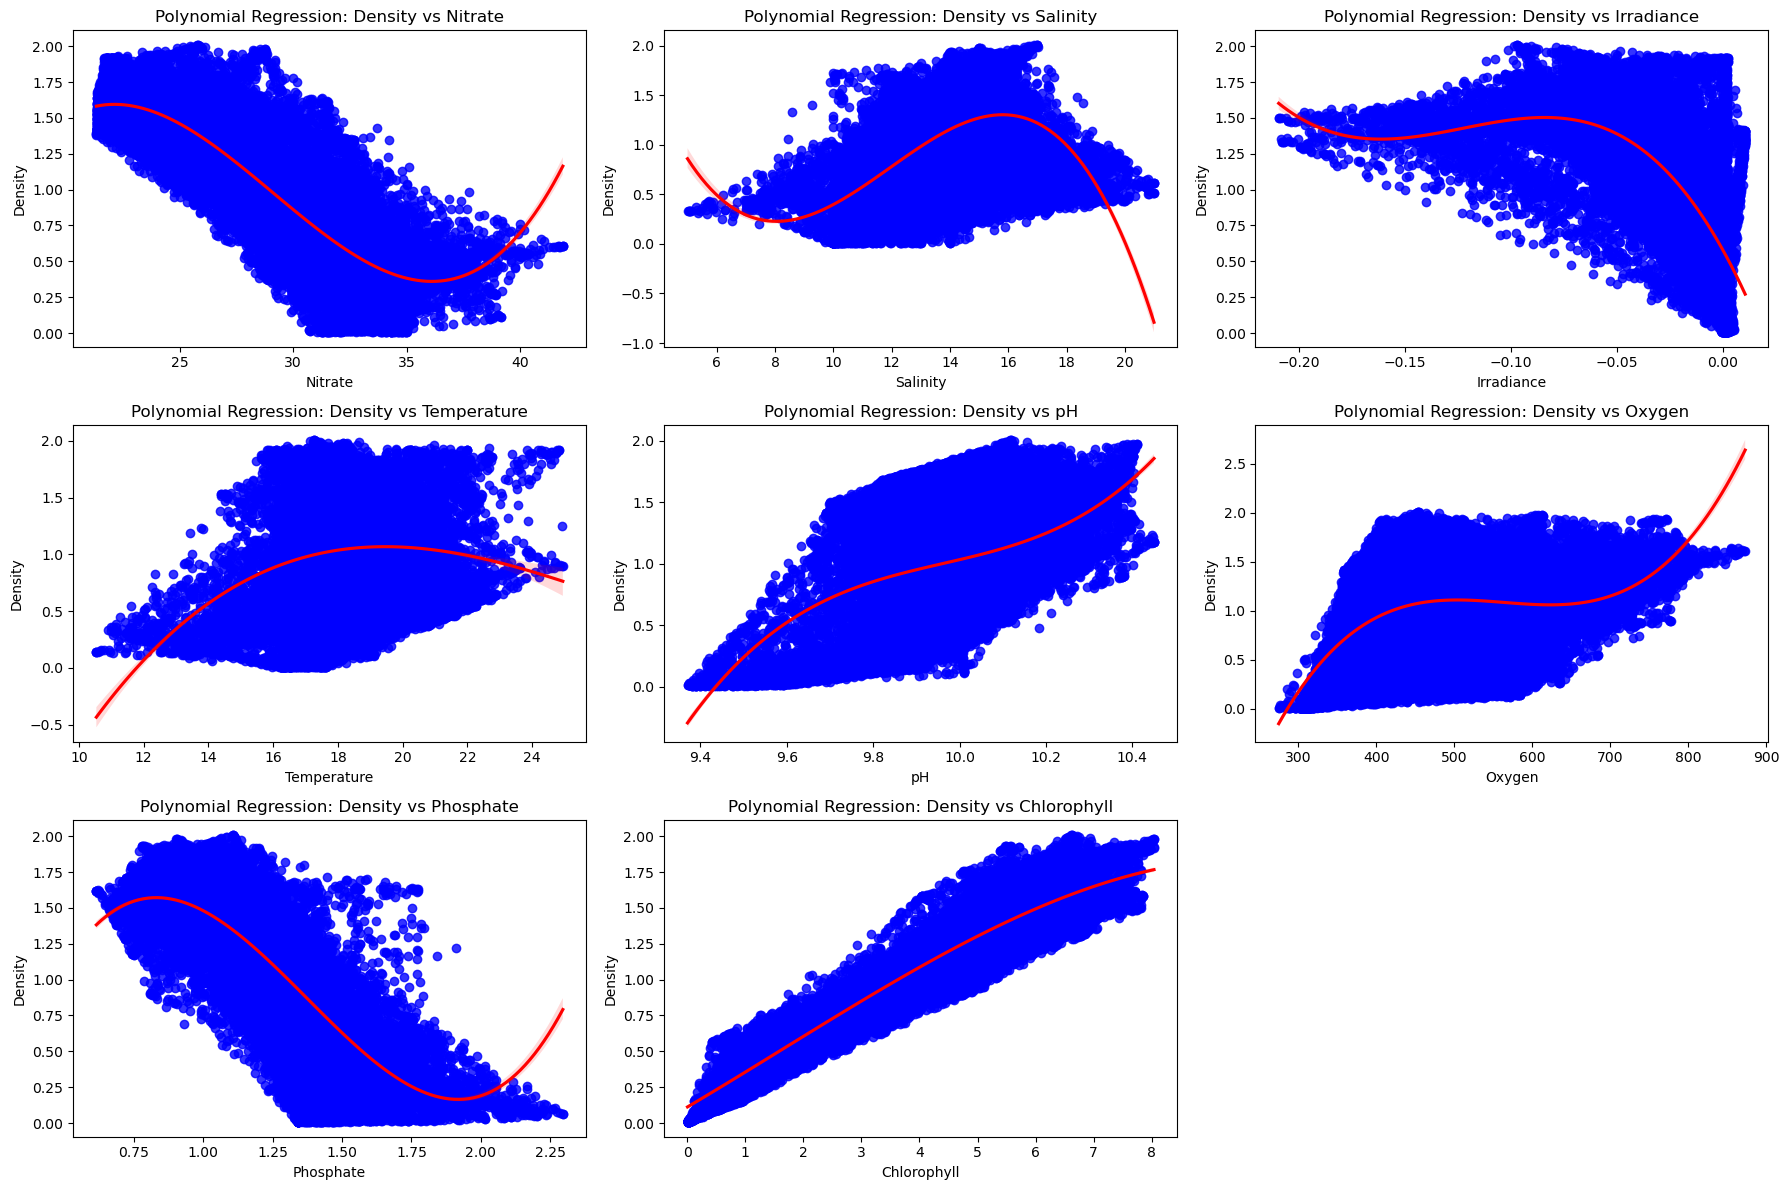

In [33]:
import numpy as np
import seaborn as sns

# Function to plot polynomial regression lines
plt.figure(figsize=(18, 12))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.regplot(
        x=feature, y='Density', data=df, order=3,  # Order=3 adds a polynomial fit
        scatter_kws={"color": "blue"}, line_kws={"color": "red"}
    )
    plt.title(f'Polynomial Regression: Density vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = pd.read_csv("new_data.csv")

# List of features to plot
features = ['nitrate', 'salinity', 'irradiance', 'temperature', 'ph', 'oxygen', 'phosphate', 'chlorophyll']

# Set up the plotting area
plt.figure(figsize=(13, 12))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)  # 3x3 grid for 8 plots
    sns.histplot(data[feature], kde=False)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# **Prediction Models**

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score


# Prepare the features and target variable
X = np.column_stack((nitrate_data, salinity_data, irradiance_data, temperature_data, ph_data, oxygen_data, phosphate_data, chlorophyll_data))  # Assuming salinity_data is available
y = density_data

**1. Stacking**

In [35]:
#***STACKING MODEL***

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
rf_predictions = rf_regressor.predict(X_test)

# Gradient Boosting model
gb_regressor = GradientBoostingRegressor(random_state=42)
gb_regressor.fit(X_train, y_train)
gb_predictions = gb_regressor.predict(X_test)

# SVR model
svr = SVR(kernel='rbf')  # You can adjust the kernel and other hyperparameters
svr.fit(X_train, y_train)
svr_predictions = svr.predict(X_test)

# Combine predictions using stacking
stacked_predictions = np.column_stack((rf_predictions, gb_predictions, svr_predictions))
final_predictions = np.mean(stacked_predictions, axis=1)




/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
# Predictions on the training set
rf_train_predictions = rf_regressor.predict(X_train)
gb_train_predictions = gb_regressor.predict(X_train)
svr_train_predictions = svr.predict(X_train)

# Combine training predictions using stacking
stacked_train_predictions = np.column_stack((rf_train_predictions, gb_train_predictions, svr_train_predictions))
final_train_predictions = np.mean(stacked_train_predictions, axis=1)

# Evaluate stacked model on training set
st_train_mse = mean_squared_error(y_train, final_train_predictions)
st_train_rmse = np.sqrt(st_train_mse)  # Root Mean Squared Error
st_train_r2 = r2_score(y_train, final_train_predictions)
st_train_ev = explained_variance_score(y_train, final_train_predictions) #Explained variance

print("Stacking Training MSE:", st_train_mse)
print("Stacking Training RMSE:", st_train_rmse)
print("Stacking Training R^2 Score:", st_train_r2)
print("Stacking Training Explained Variance:", st_train_ev)


Stacking Training MSE: 0.0065796731810880945
Stacking Training RMSE: 0.08111518465175367
Stacking Training R^2 Score: 0.975255649105398
Stacking Training Explained Variance: 0.9752646657056333


In [37]:
# Evaluate stacked model
st_test_mse = mean_squared_error(y_test, final_predictions)
st_test_rmse = np.sqrt(st_test_mse)  # Root Mean Squared Error
st_test_r2 = r2_score(y_test, final_predictions)
st_test_ev = explained_variance_score(y_test, final_predictions)  # Explained Variance


print("\nStacking Test MSE:", st_test_mse)
print("Stacking Test RMSE:", st_test_rmse)
print("Stacking Test R^2 Score:", st_test_r2)
print("Stacking Test Explained Variance:", st_test_ev)


Stacking Test MSE: 0.008782677995395944
Stacking Test RMSE: 0.09371594312280032
Stacking Test R^2 Score: 0.9672330434826586
Stacking Test Explained Variance: 0.9672950356877137


In [38]:
# Convert y_test to 1D array using ravel()
y_test_flattened = np.ravel(y_test)

# Combine actual and predicted values into a DataFrame
results_df = pd.DataFrame({'Actual': y_test_flattened, 'Predicted': final_predictions})

# Print the DataFrame
print(results_df)

      Actual  Predicted
0     0.6273   0.553950
1     1.8182   1.823896
2     1.1942   1.370979
3     1.6888   1.575916
4     0.2755   0.271657
...      ...        ...
3995  0.3786   0.449712
3996  0.1146   0.159039
3997  1.5635   1.444433
3998  0.9184   1.011755
3999  1.3600   1.422744

[4000 rows x 2 columns]


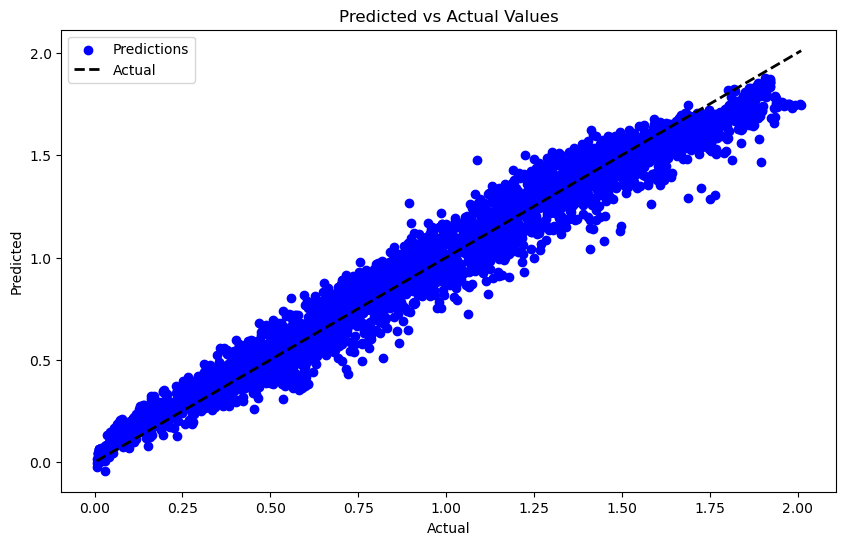

In [39]:
# Plot predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, final_predictions, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.show()


**2. xGBoost**

In [40]:
#***XGBOOST MODEL***

import xgboost as xgb

# Define XGBoost model
xgb_model = xgb.XGBRegressor()

# Train the model
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [41]:
# Predictions on the training set
xgb_train_predictions = xgb_model.predict(X_train)

# Evaluate on the training set
xgb_train_mse = mean_squared_error(y_train, xgb_train_predictions)
xgb_train_rmse = np.sqrt(xgb_train_mse)  # Root Mean Squared Error
xgb_train_r2 = r2_score(y_train, xgb_train_predictions)
xgb_train_ev = explained_variance_score(y_train, xgb_train_predictions)  # Explained Variance

# Print evaluation metrics
print("XGBoost Training MSE:", xgb_train_mse)
print("XGBoost Training RMSE:", xgb_train_rmse)
print("XGBoost Training R^2 Score:", xgb_train_r2)
print("XGBoost Training Explained Variance:", xgb_train_ev)

XGBoost Training MSE: 0.0018074519636443042
XGBoost Training RMSE: 0.04251413839705921
XGBoost Training R^2 Score: 0.9932026676124124
XGBoost Training Explained Variance: 0.9932026676401112


In [42]:
# Predictions on the test set
xgb_predictions = xgb_model.predict(X_test)

# Evaluate on the test set
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_rmse = np.sqrt(xgb_mse)  # Root Mean Squared Error
xgb_r2 = r2_score(y_test, xgb_predictions)
xgb_ev = explained_variance_score(y_test, xgb_predictions)  # Explained Variance

# Print evaluation metrics
print("XGBoost Testing MSE:", xgb_mse)
print("XGBoost Testing RMSE:", xgb_rmse)
print("XGBoost Testing R^2 Score:", xgb_r2)
print("XGBoost Testing Explained Variance:", xgb_ev)

XGBoost Testing MSE: 0.004549855282209194
XGBoost Testing RMSE: 0.06745261508799487
XGBoost Testing R^2 Score: 0.9830251194145455
XGBoost Testing Explained Variance: 0.9830273649240564


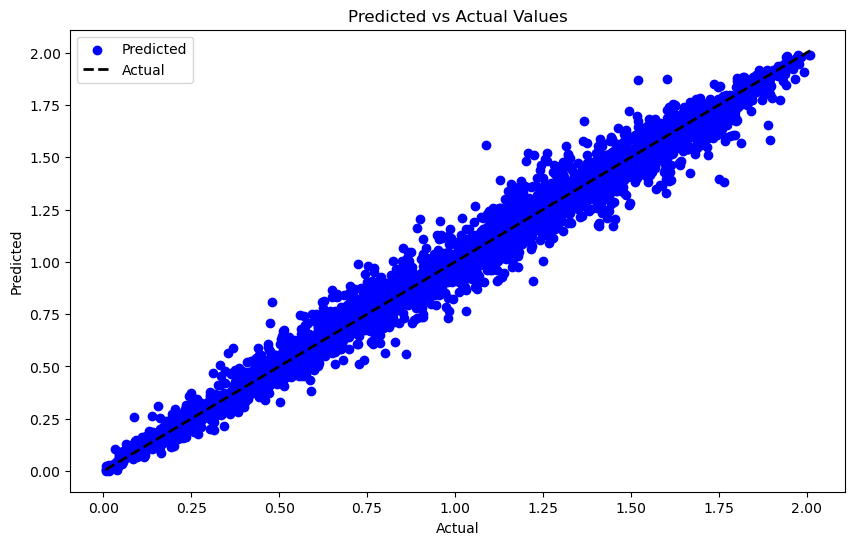

In [43]:
# Plot predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, xgb_predictions, color='blue', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.show()


**Hyperparameter tuning:**

1. Grid Search: This method systematically explores a predefined grid of hyperparameter values by trying every possible combination. It ensures that the best possible set of parameters within the grid is found but can be computationally expensive, especially with large search spaces or multiple hyperparameters.

2. Random Search: Random search samples hyperparameter values randomly from the search space. This approach is often more efficient than grid search, as it can explore a broader range of values in the same amount of time, potentially finding near-optimal solutions without testing every possibility, but results in different values everytime it is being executed.

3. Hyperopt: Hyperopt is a powerful Python library for optimizing hyperparameters in machine learning models. It is particularly effective when traditional methods like grid search or manual tuning become impractical due to the complexity or size of the search space.

**3. SVR (Support Vector Regressor)**

Automated hyperparameter tuning in SVR



3. Hyperopt

In [46]:
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Define the objective function
def objective(params):
    model = SVR(kernel='rbf', C=params['C'], epsilon=params['epsilon'])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    mse = mean_squared_error(y_train, y_pred)
    return {'loss': mse, 'status': STATUS_OK}

# Define the search space
search_space = {
    'C': hp.loguniform('C', -3, 6),  # log scale for C (1e-3 to 1e3)
    'epsilon': hp.loguniform('epsilon', -4, -1)  # log scale for epsilon (1e-4 to 1e-1)
}

# Perform the optimization
best_params = fmin(fn=objective, space=search_space, algo=tpe.suggest, max_evals=50)

print(f"Best parameters from Hyperopt: {best_params}")

# Train the SVR model with the best parameters on the full training set
svr_model = SVR(kernel='rbf', C=best_params['C'], epsilon=best_params['epsilon'])
svr_model.fit(X_train, y_train)

# Predictions on the training set
y_train_pred_svr = svr_model.predict(X_train)

# Evaluate on the training set
train_mse_svr = mean_squared_error(y_train, y_train_pred_svr)
train_rmse_svr = np.sqrt(train_mse_svr)  # Root Mean Squared Error
train_r2_svr = r2_score(y_train, y_train_pred_svr)
train_ev_svr = explained_variance_score(y_train, y_train_pred_svr)  # Explained Variance

# Print evaluation metrics
print(f'SVM Regression Training MSE (Hyperopt): {train_mse_svr}')
print(f'SVM Regression Training RMSE (Hyperopt): {train_rmse_svr}')
print(f'SVM Regression Training R^2 (Hyperopt): {train_r2_svr}')
print(f'SVM Regression Training Explained Variance (Hyperopt): {train_ev_svr}')


  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



  2%|▏         | 1/50 [00:07<06:21,  7.79s/trial, best loss: 0.1312740581685929]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



  4%|▍         | 2/50 [00:22<09:24, 11.76s/trial, best loss: 0.01888337323156187]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



  6%|▌         | 3/50 [00:27<06:51,  8.75s/trial, best loss: 0.01888337323156187]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



  8%|▊         | 4/50 [00:33<05:57,  7.78s/trial, best loss: 0.01888337323156187]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 10%|█         | 5/50 [00:47<07:26,  9.91s/trial, best loss: 0.01888337323156187]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 12%|█▏        | 6/50 [00:52<06:03,  8.25s/trial, best loss: 0.01888337323156187]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 14%|█▍        | 7/50 [01:05<07:07,  9.95s/trial, best loss: 0.01888337323156187]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 16%|█▌        | 8/50 [01:10<05:50,  8.34s/trial, best loss: 0.01888337323156187]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 18%|█▊        | 9/50 [01:12<04:15,  6.23s/trial, best loss: 0.01888337323156187]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 20%|██        | 10/50 [01:25<05:29,  8.24s/trial, best loss: 0.01888337323156187]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 22%|██▏       | 11/50 [01:38<06:26,  9.92s/trial, best loss: 0.01888337323156187]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 24%|██▍       | 12/50 [01:49<06:29, 10.26s/trial, best loss: 0.01888337323156187]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 26%|██▌       | 13/50 [01:57<05:50,  9.48s/trial, best loss: 0.01888337323156187]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 28%|██▊       | 14/50 [02:14<06:59, 11.66s/trial, best loss: 0.014434268195590117]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 30%|███       | 15/50 [02:27<07:00, 12.03s/trial, best loss: 0.014434268195590117]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 32%|███▏      | 16/50 [02:42<07:18, 12.90s/trial, best loss: 0.014434268195590117]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 34%|███▍      | 17/50 [02:56<07:25, 13.49s/trial, best loss: 0.014434268195590117]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 36%|███▌      | 18/50 [03:01<05:45, 10.81s/trial, best loss: 0.014434268195590117]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 38%|███▊      | 19/50 [03:15<06:06, 11.83s/trial, best loss: 0.014434268195590117]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 40%|████      | 20/50 [03:31<06:31, 13.05s/trial, best loss: 0.014434268195590117]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 42%|████▏     | 21/50 [03:46<06:34, 13.59s/trial, best loss: 0.014434268195590117]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 44%|████▍     | 22/50 [03:59<06:14, 13.36s/trial, best loss: 0.014434268195590117]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 46%|████▌     | 23/50 [04:14<06:11, 13.75s/trial, best loss: 0.014434268195590117]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 48%|████▊     | 24/50 [04:27<05:57, 13.75s/trial, best loss: 0.014434268195590117]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 50%|█████     | 25/50 [04:37<05:16, 12.65s/trial, best loss: 0.014434268195590117]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 52%|█████▏    | 26/50 [04:54<05:30, 13.78s/trial, best loss: 0.014434268195590117]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 54%|█████▍    | 27/50 [05:05<04:59, 13.02s/trial, best loss: 0.014434268195590117]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 56%|█████▌    | 28/50 [05:07<03:31,  9.62s/trial, best loss: 0.014434268195590117]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 58%|█████▊    | 29/50 [05:22<03:58, 11.37s/trial, best loss: 0.014434268195590117]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 60%|██████    | 30/50 [05:40<04:26, 13.33s/trial, best loss: 0.014434268195590117]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 62%|██████▏   | 31/50 [05:58<04:38, 14.64s/trial, best loss: 0.014434268195590117]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 64%|██████▍   | 32/50 [06:10<04:12, 14.00s/trial, best loss: 0.014434268195590117]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 66%|██████▌   | 33/50 [06:14<03:05, 10.91s/trial, best loss: 0.014434268195590117]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 68%|██████▊   | 34/50 [06:21<02:35,  9.70s/trial, best loss: 0.014434268195590117]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 70%|███████   | 35/50 [06:32<02:31, 10.09s/trial, best loss: 0.014434268195590117]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 72%|███████▏  | 36/50 [06:48<02:47, 11.93s/trial, best loss: 0.014434268195590117]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 74%|███████▍  | 37/50 [06:59<02:32, 11.72s/trial, best loss: 0.014434268195590117]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 76%|███████▌  | 38/50 [07:15<02:35, 12.95s/trial, best loss: 0.014434268195590117]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 78%|███████▊  | 39/50 [07:21<02:00, 10.91s/trial, best loss: 0.014434268195590117]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 80%|████████  | 40/50 [07:33<01:52, 11.25s/trial, best loss: 0.014434268195590117]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 82%|████████▏ | 41/50 [07:39<01:24,  9.44s/trial, best loss: 0.014434268195590117]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 84%|████████▍ | 42/50 [07:52<01:26, 10.75s/trial, best loss: 0.014434268195590117]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 86%|████████▌ | 43/50 [08:02<01:12, 10.39s/trial, best loss: 0.014434268195590117]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 88%|████████▊ | 44/50 [08:03<00:44,  7.47s/trial, best loss: 0.014434268195590117]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 90%|█████████ | 45/50 [08:16<00:46,  9.26s/trial, best loss: 0.014434268195590117]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 92%|█████████▏| 46/50 [08:29<00:41, 10.47s/trial, best loss: 0.014434268195590117]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 94%|█████████▍| 47/50 [08:40<00:31, 10.48s/trial, best loss: 0.014434268195590117]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 96%|█████████▌| 48/50 [08:48<00:19,  9.95s/trial, best loss: 0.014434268195590117]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 98%|█████████▊| 49/50 [09:01<00:10, 10.65s/trial, best loss: 0.014434268195590117]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



100%|██████████| 50/50 [09:05<00:00, 10.91s/trial, best loss: 0.014434268195590117]
Best parameters from Hyperopt: {'C': 388.7344729329167, 'epsilon': 0.04980204541689253}


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM Regression Training MSE (Hyperopt): 0.014434268195590117
SVM Regression Training RMSE (Hyperopt): 0.12014269930208042
SVM Regression Training R^2 (Hyperopt): 0.9457166659637326
SVM Regression Training Explained Variance (Hyperopt): 0.9457404242310522


In [47]:
y_pred_svr = svr_model.predict(X_test)

# Evaluation on the test set
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)  # Root Mean Squared Error
r2_svr = r2_score(y_test, y_pred_svr)
ev_svr = explained_variance_score(y_test, y_pred_svr)  # Explained Variance

# Print evaluation metrics
print(f'SVM Regression Testing MSE: {mse_svr}')
print(f'SVM Regression Testing RMSE: {rmse_svr}')
print(f'SVM Regression Testing R^2: {r2_svr}')
print(f'SVM Regression Testing Explained Variance: {ev_svr}')


SVM Regression Testing MSE: 0.014915217768870505
SVM Regression Testing RMSE: 0.12212787465959811
SVM Regression Testing R^2: 0.9443533860246888
SVM Regression Testing Explained Variance: 0.9444478512881398


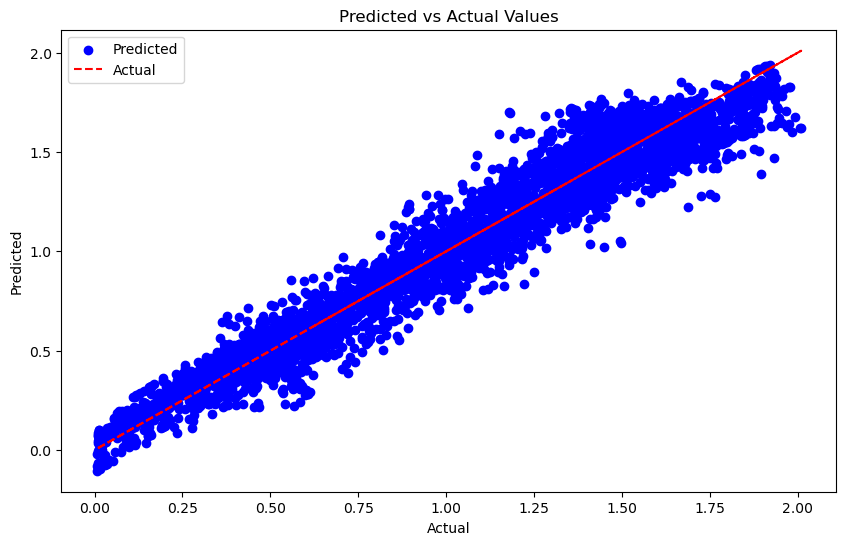

In [48]:
# Plot predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svr, color='blue', label='Predicted', alpha=1)  # Predicted values
plt.plot(y_test, y_test, color='red', linestyle='--', label='Actual')  # Actual values
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.show()


**4. Gradient Boosting Machine (GBM)**

Automated hyperparameter tuning in GBM

3. Hyperopt

In [51]:
import hyperopt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Define the objective function
def objective(params):
    model = GradientBoostingRegressor(
        n_estimators=int(params['n_estimators']),
        learning_rate=params['learning_rate'],
        max_depth=int(params['max_depth']),
        random_state=42
    )
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    return {'loss': mse, 'status': STATUS_OK}

# Define the search space
space = {
    'n_estimators': hp.quniform('n_estimators', 50, 150, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
    'max_depth': hp.quniform('max_depth', 1, 6, 1)
}

# Run the optimization
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=50,
            trials=trials,
            rstate=np.random.default_rng(42))

# Extract the best hyperparameters
best_params = {
    'n_estimators': int(best['n_estimators']),
    'learning_rate': best['learning_rate'],
    'max_depth': int(best['max_depth'])
}
print(f"Best parameters: {best_params}")

# Train the final model with the best parameters using the full dataset
gbm_model = GradientBoostingRegressor(random_state=42, **best_params)
gbm_model.fit(X_train, y_train)

# Predictions on the training set
y_train_pred_gbm = gbm_model.predict(X_train)

# Evaluation on the training set
train_mse_gbm = mean_squared_error(y_train, y_train_pred_gbm)
train_rmse_gbm = np.sqrt(train_mse_gbm)  # Root Mean Squared Error
train_r2_gbm = r2_score(y_train, y_train_pred_gbm)
train_ev_gbm = explained_variance_score(y_train, y_train_pred_gbm)  # Explained Variance

# Print evaluation metrics
print(f'Gradient Boosting Training MSE: {train_mse_gbm}')
print(f'Gradient Boosting Training RMSE: {train_rmse_gbm}')
print(f'Gradient Boosting Training R^2: {train_r2_gbm}')
print(f'Gradient Boosting Training Explained Variance: {train_ev_gbm}')


  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?



  2%|▏         | 1/50 [00:07<06:04,  7.45s/trial, best loss: 0.005954409546639948]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?



  4%|▍         | 2/50 [00:11<04:35,  5.73s/trial, best loss: 0.005954409546639948]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?



  6%|▌         | 3/50 [00:12<02:47,  3.56s/trial, best loss: 0.005954409546639948]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?



  8%|▊         | 4/50 [00:15<02:27,  3.20s/trial, best loss: 0.005954409546639948]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?



 10%|█         | 5/50 [00:17<01:56,  2.60s/trial, best loss: 0.005954409546639948]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?



 12%|█▏        | 6/50 [00:20<02:10,  2.96s/trial, best loss: 0.005954409546639948]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?



 14%|█▍        | 7/50 [00:30<03:43,  5.19s/trial, best loss: 0.005954409546639948]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?



 16%|█▌        | 8/50 [00:34<03:21,  4.79s/trial, best loss: 0.005954409546639948]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?



 18%|█▊        | 9/50 [00:42<04:03,  5.94s/trial, best loss: 0.005954409546639948]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?



 20%|██        | 10/50 [00:46<03:28,  5.21s/trial, best loss: 0.005954409546639948]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?



 22%|██▏       | 11/50 [00:47<02:30,  3.86s/trial, best loss: 0.005954409546639948]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?



 24%|██▍       | 12/50 [00:54<03:05,  4.88s/trial, best loss: 0.005954409546639948]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?



 26%|██▌       | 13/50 [01:00<03:07,  5.06s/trial, best loss: 0.005954409546639948]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?



 28%|██▊       | 14/50 [01:02<02:34,  4.28s/trial, best loss: 0.005954409546639948]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?



 30%|███       | 15/50 [01:08<02:47,  4.79s/trial, best loss: 0.005954409546639948]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?



 32%|███▏      | 16/50 [01:19<03:50,  6.77s/trial, best loss: 0.005604284563990634]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?



 34%|███▍      | 17/50 [01:29<04:12,  7.65s/trial, best loss: 0.005072498427634789]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?



 36%|███▌      | 18/50 [01:31<03:14,  6.07s/trial, best loss: 0.005072498427634789]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?



 38%|███▊      | 19/50 [01:37<03:00,  5.82s/trial, best loss: 0.005072498427634789]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?



 40%|████      | 20/50 [01:43<03:01,  6.07s/trial, best loss: 0.005072498427634789]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?



 42%|████▏     | 21/50 [01:51<03:09,  6.55s/trial, best loss: 0.005072498427634789]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?



 44%|████▍     | 22/50 [02:04<03:54,  8.37s/trial, best loss: 0.0047361603520447455]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?



 46%|████▌     | 23/50 [02:16<04:18,  9.56s/trial, best loss: 0.00471770816765728]  

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?



 48%|████▊     | 24/50 [02:28<04:30, 10.40s/trial, best loss: 0.00471770816765728]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?



 50%|█████     | 25/50 [02:41<04:34, 10.99s/trial, best loss: 0.00471770816765728]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?



 52%|█████▏    | 26/50 [02:53<04:34, 11.46s/trial, best loss: 0.004679170271878283]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?



 54%|█████▍    | 27/50 [03:00<03:48,  9.92s/trial, best loss: 0.004679170271878283]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?



 56%|█████▌    | 28/50 [03:11<03:49, 10.43s/trial, best loss: 0.004679170271878283]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?



 58%|█████▊    | 29/50 [03:17<03:11,  9.14s/trial, best loss: 0.004679170271878283]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?



 60%|██████    | 30/50 [03:25<02:53,  8.67s/trial, best loss: 0.004679170271878283]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?



 62%|██████▏   | 31/50 [03:31<02:31,  7.97s/trial, best loss: 0.004679170271878283]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?



 64%|██████▍   | 32/50 [03:42<02:39,  8.86s/trial, best loss: 0.004679170271878283]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?



 66%|██████▌   | 33/50 [03:49<02:22,  8.38s/trial, best loss: 0.004679170271878283]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?



 68%|██████▊   | 34/50 [04:02<02:33,  9.62s/trial, best loss: 0.004679170271878283]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?



 70%|███████   | 35/50 [04:07<02:04,  8.28s/trial, best loss: 0.004679170271878283]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?



 72%|███████▏  | 36/50 [04:17<02:04,  8.91s/trial, best loss: 0.004679170271878283]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?



 74%|███████▍  | 37/50 [04:23<01:41,  7.79s/trial, best loss: 0.004679170271878283]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?



 76%|███████▌  | 38/50 [04:27<01:19,  6.62s/trial, best loss: 0.004679170271878283]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?



 78%|███████▊  | 39/50 [04:36<01:23,  7.57s/trial, best loss: 0.004679170271878283]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?



 80%|████████  | 40/50 [04:37<00:55,  5.59s/trial, best loss: 0.004679170271878283]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?



 82%|████████▏ | 41/50 [04:46<00:59,  6.59s/trial, best loss: 0.004679170271878283]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?



 84%|████████▍ | 42/50 [04:55<00:57,  7.15s/trial, best loss: 0.004679170271878283]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?



 86%|████████▌ | 43/50 [05:02<00:49,  7.11s/trial, best loss: 0.004679170271878283]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?



 88%|████████▊ | 44/50 [05:05<00:35,  6.00s/trial, best loss: 0.004679170271878283]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?



 90%|█████████ | 45/50 [05:15<00:35,  7.20s/trial, best loss: 0.004679170271878283]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?



 92%|█████████▏| 46/50 [05:26<00:33,  8.31s/trial, best loss: 0.004679170271878283]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?



 94%|█████████▍| 47/50 [05:32<00:22,  7.59s/trial, best loss: 0.004679170271878283]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?



 96%|█████████▌| 48/50 [05:38<00:14,  7.22s/trial, best loss: 0.004679170271878283]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?



 98%|█████████▊| 49/50 [05:42<00:06,  6.17s/trial, best loss: 0.004679170271878283]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?



100%|██████████| 50/50 [05:50<00:00,  7.01s/trial, best loss: 0.004679170271878283]
Best parameters: {'n_estimators': 150, 'learning_rate': 0.14501128465151847, 'max_depth': 6}


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Gradient Boosting Training MSE: 0.002234357140516725
Gradient Boosting Training RMSE: 0.04726898709002262
Gradient Boosting Training R^2: 0.9915971940266397
Gradient Boosting Training Explained Variance: 0.9915971940266397


In [52]:
# Predictions
y_pred_gbm = gbm_model.predict(X_test)

# Evaluation on the test set
mse_gbm = mean_squared_error(y_test, y_pred_gbm)
rmse_gbm = np.sqrt(mse_gbm)  # Root Mean Squared Error
r2_gbm = r2_score(y_test, y_pred_gbm)
ev_gbm = explained_variance_score(y_test, y_pred_gbm)  # Explained Variance

# Print evaluation metrics
print(f'Gradient Boosting Testing MSE: {mse_gbm}')
print(f'Gradient Boosting Testing RMSE: {rmse_gbm}')
print(f'Gradient Boosting Testing R^2: {r2_gbm}')
print(f'Gradient Boosting Testing Explained Variance: {ev_gbm}')

Gradient Boosting Testing MSE: 0.004679170271878283
Gradient Boosting Testing RMSE: 0.0684044609062763
Gradient Boosting Testing R^2: 0.9825426630788187
Gradient Boosting Testing Explained Variance: 0.9825562839789775


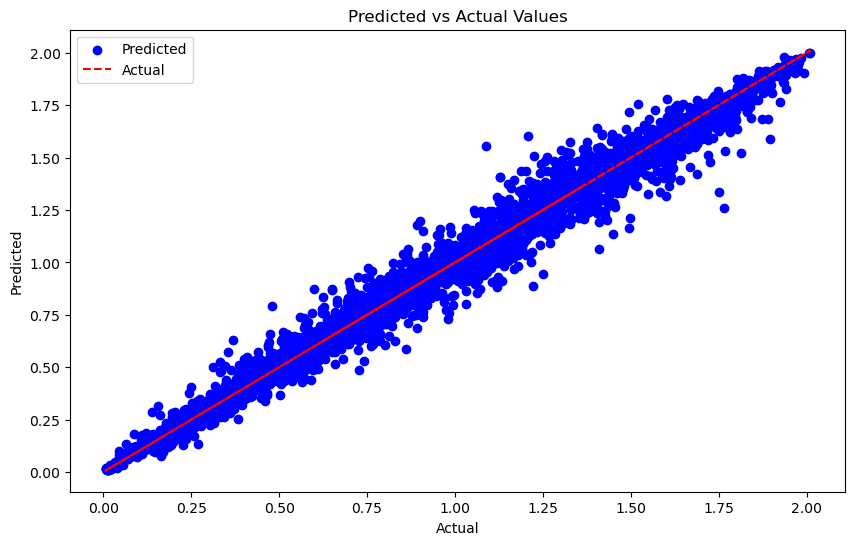

In [53]:
# Plot predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gbm, color='blue', label='Predicted', alpha=1)  # Predicted values
plt.plot(y_test, y_test, color='red', linestyle='--', label='Actual')  # Actual values
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.show()


**5. CatBoost**

Automated hyperparameter tuning in CatBoost

3. Hyperopt

In [56]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

# Define the objective function for Hyperopt
def objective(params):
    model = CatBoostRegressor(
        iterations=int(params['iterations']),
        learning_rate=params['learning_rate'],
        depth=int(params['depth']),
        random_seed=42,
        verbose=0  # Suppress output
    )

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    return {'loss': mse, 'status': STATUS_OK}

# Define the search space for hyperparameters
space = {
    'iterations': hp.quniform('iterations', 100, 1000, 50),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
    'depth': hp.quniform('depth', 3, 10, 1)
}

# Run the optimization
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=50,
            trials=trials,
            rstate=np.random.default_rng(42))

# Extract the best hyperparameters
best_params = {
    'iterations': int(best['iterations']),
    'learning_rate': best['learning_rate'],
    'depth': int(best['depth'])
}
print(f"Best parameters: {best_params}")

# Train the final model with the best parameters using the full dataset
catboost_model = CatBoostRegressor(random_seed=42, **best_params)
catboost_model.fit(X_train, y_train)

# Predictions on the training set
y_train_pred_catboost = catboost_model.predict(X_train)

# Evaluation on the training set
train_mse_catboost = mean_squared_error(y_train, y_train_pred_catboost)
train_rmse_catboost = np.sqrt(train_mse_catboost)  # Root Mean Squared Error
train_r2_catboost = r2_score(y_train, y_train_pred_catboost)
train_ev_catboost = explained_variance_score(y_train, y_train_pred_catboost)  # Explained Variance

# Print evaluation metrics
print(f'CatBoost Training MSE: {train_mse_catboost}')
print(f'CatBoost Training RMSE: {train_rmse_catboost}')
print(f'CatBoost Training R^2: {train_r2_catboost}')
print(f'CatBoost Training Explained Variance: {train_ev_catboost}')


100%|██████████| 50/50 [02:05<00:00,  2.50s/trial, best loss: 0.00303459024278422]  
Best parameters: {'iterations': 800, 'learning_rate': 0.14394249091697908, 'depth': 10}
0:	learn: 0.4496018	total: 7.69ms	remaining: 6.15s
1:	learn: 0.3931579	total: 14.2ms	remaining: 5.65s
2:	learn: 0.3442894	total: 21.3ms	remaining: 5.65s
3:	learn: 0.3031773	total: 27.5ms	remaining: 5.47s
4:	learn: 0.2672165	total: 34.1ms	remaining: 5.42s
5:	learn: 0.2365752	total: 41.3ms	remaining: 5.46s
6:	learn: 0.2112082	total: 47.9ms	remaining: 5.43s
7:	learn: 0.1892533	total: 55ms	remaining: 5.45s
8:	learn: 0.1708415	total: 61.8ms	remaining: 5.43s
9:	learn: 0.1554589	total: 73.1ms	remaining: 5.77s
10:	learn: 0.1427859	total: 80ms	remaining: 5.74s
11:	learn: 0.1325296	total: 86.4ms	remaining: 5.67s
12:	learn: 0.1234425	total: 93.2ms	remaining: 5.64s
13:	learn: 0.1159954	total: 99.7ms	remaining: 5.6s
14:	learn: 0.1105887	total: 106ms	remaining: 5.55s
15:	learn: 0.1055841	total: 113ms	remaining: 5.53s
16:	learn: 0

In [57]:
# Predictions
y_pred_catboost = catboost_model.predict(X_test)

# Evaluation on the test set
mse_catboost = mean_squared_error(y_test, y_pred_catboost)
rmse_catboost = np.sqrt(mse_catboost)  # Root Mean Squared Error
r2_catboost = r2_score(y_test, y_pred_catboost)
ev_catboost = explained_variance_score(y_test, y_pred_catboost)  # Explained Variance

# Print evaluation metrics
print(f'CatBoost Testing MSE: {mse_catboost}')
print(f'CatBoost Testing RMSE: {rmse_catboost}')
print(f'CatBoost Testing R^2: {r2_catboost}')
print(f'CatBoost Testing Explained Variance: {ev_catboost}')


CatBoost Testing MSE: 0.00303459024278422
CatBoost Testing RMSE: 0.0550871150341368
CatBoost Testing R^2: 0.9886783636397253
CatBoost Testing Explained Variance: 0.9886797588072312


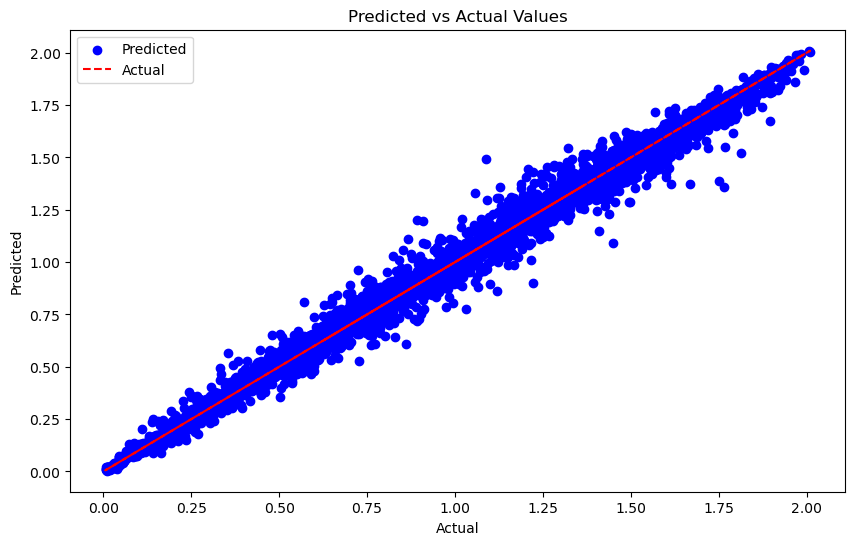

In [58]:
# Plot predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_catboost, color='blue', label='Predicted', alpha=1)  # Predicted values
plt.plot(y_test, y_test, color='red', linestyle='--', label='Actual')  # Actual values
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.show()


**6. Neural networks**

3. Hyperopt

In [62]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Define a function to create the model
def create_model(params):
    model = Sequential()
    model.add(Dense(units=int(params['units_1']), activation='relu', input_dim=X_train.shape[1]))
    model.add(Dense(units=int(params['units_2']), activation='relu'))
    model.add(Dense(1))  # Assuming a regression task
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Define the objective function for Hyperopt
def objective(params):
    model = create_model(params)

    # Define EarlyStopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    model.fit(X_train, y_train,
              epochs=50,
              batch_size=int(params['batch_size']),
              validation_split=0.2,  # Use 20% of the training data for validation
              callbacks=[early_stopping],
              verbose=0)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    return {'loss': mse, 'status': STATUS_OK}

# Define the search space for hyperparameters
space = {
    'units_1': hp.quniform('units_1', 32, 256, 16),
    'units_2': hp.quniform('units_2', 32, 256, 16),
    'batch_size': hp.quniform('batch_size', 16, 128, 16)
}

# Run the optimization
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=50,
            trials=trials,
            rstate=np.random.default_rng(42))

# Extract the best hyperparameters
best_params = {
    'units_1': int(best['units_1']),
    'units_2': int(best['units_2']),
    'batch_size': int(best['batch_size'])
}
print(f"Best parameters: {best_params}")

# Train the final model with the best parameters using the full dataset
final_model = create_model(best_params)

# EarlyStopping for the final training
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

final_model.fit(X_train, y_train,
                epochs=50,
                batch_size=best_params['batch_size'],
                validation_split=0.2,
                callbacks=[early_stopping],
                verbose=1)

# Predictions on the training set
y_train_pred = final_model.predict(X_train)

# Evaluation on the training set
train_mse_nn = mean_squared_error(y_train, y_train_pred)
train_rmse_nn = np.sqrt(train_mse_nn)  # Root Mean Squared Error
train_r2_nn = r2_score(y_train, y_train_pred)
train_ev_nn = explained_variance_score(y_train, y_train_pred)  # Explained Variance

# Print evaluation metrics
print(f'Neural Network Training MSE: {train_mse_nn}')
print(f'Neural Network Training RMSE: {train_rmse_nn}')
print(f'Neural Network Training R^2: {train_r2_nn}')
print(f'Neural Network Training Explained Variance: {train_ev_nn}')


  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



  1/125 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step

  2%|▏         | 1/50 [00:06<05:11,  6.35s/trial, best loss: 0.02992518999985618]

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



  1/125 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step               
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step     

  4%|▍         | 2/50 [00:12<04:51,  6.07s/trial, best loss: 0.02319747618635869]

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



  1/125 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step               
 90/125 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step     
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step    

  6%|▌         | 3/50 [00:18<04:54,  6.26s/trial, best loss: 0.021033964994939182]

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



  1/125 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step                
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step      

  8%|▊         | 4/50 [00:23<04:24,  5.76s/trial, best loss: 0.021033964994939182]

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



  1/125 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step                
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step      

 10%|█         | 5/50 [00:26<03:35,  4.79s/trial, best loss: 0.021033964994939182]

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



  1/125 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step                
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step      

 12%|█▏        | 6/50 [00:32<03:49,  5.21s/trial, best loss: 0.021033964994939182]

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



  1/125 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step                
123/125 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step      
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step     

 14%|█▍        | 7/50 [00:40<04:24,  6.15s/trial, best loss: 0.021033964994939182]

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



  1/125 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step                
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step      

 16%|█▌        | 8/50 [00:44<03:43,  5.32s/trial, best loss: 0.021033964994939182]

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



  1/125 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step                
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step      

 18%|█▊        | 9/50 [01:14<08:51, 12.97s/trial, best loss: 0.015212717520820039]

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



  1/125 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step                
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step      

 20%|██        | 10/50 [01:19<07:00, 10.51s/trial, best loss: 0.015212717520820039]

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



  1/125 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step                 
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step       

 22%|██▏       | 11/50 [01:23<05:41,  8.75s/trial, best loss: 0.015212717520820039]

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



  1/125 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step                 
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step       

 24%|██▍       | 12/50 [01:29<05:00,  7.92s/trial, best loss: 0.015212717520820039]

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



  1/125 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step                 
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step       

 26%|██▌       | 13/50 [01:36<04:37,  7.51s/trial, best loss: 0.015212717520820039]

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



  1/125 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step                 
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step       

 28%|██▊       | 14/50 [01:39<03:41,  6.15s/trial, best loss: 0.015212717520820039]

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



  1/125 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step                 
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step       

 30%|███       | 15/50 [01:53<05:00,  8.60s/trial, best loss: 0.015212717520820039]

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



  1/125 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step                 
112/125 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step       
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step      

 32%|███▏      | 16/50 [02:16<07:19, 12.93s/trial, best loss: 0.015212717520820039]

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



  1/125 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step                 
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step       

 34%|███▍      | 17/50 [02:25<06:28, 11.77s/trial, best loss: 0.015212717520820039]

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



  1/125 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step                 
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step       

 36%|███▌      | 18/50 [02:29<04:57,  9.31s/trial, best loss: 0.015212717520820039]

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



  1/125 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step                 
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step       

 38%|███▊      | 19/50 [02:33<04:00,  7.76s/trial, best loss: 0.015212717520820039]

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



  1/125 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step                 
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step       

 40%|████      | 20/50 [02:40<03:45,  7.52s/trial, best loss: 0.015212717520820039]

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



  1/125 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step                 
 88/125 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step       
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step      

 42%|████▏     | 21/50 [03:28<09:32, 19.73s/trial, best loss: 0.014962077810824991]

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



  1/125 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step                 
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step       

 44%|████▍     | 22/50 [03:52<09:42, 20.79s/trial, best loss: 0.013281086143586073]

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



  1/125 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step                 
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step       

 46%|████▌     | 23/50 [04:20<10:19, 22.95s/trial, best loss: 0.013281086143586073]

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



  1/125 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step                 
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step       

 48%|████▊     | 24/50 [04:29<08:10, 18.87s/trial, best loss: 0.013281086143586073]

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



  1/125 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step                 
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step       

 50%|█████     | 25/50 [04:35<06:13, 14.96s/trial, best loss: 0.013281086143586073]

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



  1/125 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step                 
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step       

 52%|█████▏    | 26/50 [05:01<07:20, 18.34s/trial, best loss: 0.013281086143586073]

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



  1/125 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step                 
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step       

 54%|█████▍    | 27/50 [05:05<05:25, 14.15s/trial, best loss: 0.013281086143586073]

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



  1/125 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step                 
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step       

 56%|█████▌    | 28/50 [05:11<04:13, 11.51s/trial, best loss: 0.013281086143586073]

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



  1/125 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step                 
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step       

 58%|█████▊    | 29/50 [05:16<03:21,  9.59s/trial, best loss: 0.013281086143586073]

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



  1/125 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step                 
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step       

 60%|██████    | 30/50 [05:52<05:48, 17.44s/trial, best loss: 0.013281086143586073]

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



  1/125 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step                 
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step       

 62%|██████▏   | 31/50 [05:58<04:27, 14.06s/trial, best loss: 0.013281086143586073]

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



  1/125 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step                 
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step       

 64%|██████▍   | 32/50 [06:06<03:40, 12.25s/trial, best loss: 0.013281086143586073]

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



  1/125 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step                 
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step       

 66%|██████▌   | 33/50 [06:15<03:13, 11.39s/trial, best loss: 0.013281086143586073]

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



  1/125 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step                 
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step       

 68%|██████▊   | 34/50 [06:20<02:30,  9.43s/trial, best loss: 0.013281086143586073]

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



  1/125 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step                 
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step       

 70%|███████   | 35/50 [06:24<01:56,  7.74s/trial, best loss: 0.013281086143586073]

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



  1/125 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step                 
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step       

 72%|███████▏  | 36/50 [06:53<03:17, 14.14s/trial, best loss: 0.013281086143586073]

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



  1/125 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step                 
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step       

 74%|███████▍  | 37/50 [06:58<02:30, 11.57s/trial, best loss: 0.013281086143586073]

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



  1/125 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step                 
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step       

 76%|███████▌  | 38/50 [07:02<01:51,  9.28s/trial, best loss: 0.013281086143586073]

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



  1/125 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step                 
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step       

 78%|███████▊  | 39/50 [07:07<01:26,  7.86s/trial, best loss: 0.013281086143586073]

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



  1/125 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step                 
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step       

 80%|████████  | 40/50 [07:18<01:29,  8.95s/trial, best loss: 0.013281086143586073]

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



  1/125 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step                 
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step       

 82%|████████▏ | 41/50 [07:27<01:20,  8.97s/trial, best loss: 0.013281086143586073]

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



  1/125 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step                 
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step       

 84%|████████▍ | 42/50 [07:32<01:01,  7.64s/trial, best loss: 0.013281086143586073]

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



  1/125 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step                 
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step       

 86%|████████▌ | 43/50 [07:37<00:47,  6.84s/trial, best loss: 0.013281086143586073]

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



  1/125 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step                 
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step       

 88%|████████▊ | 44/50 [07:42<00:37,  6.27s/trial, best loss: 0.013281086143586073]

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



  1/125 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step                 
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step       

 90%|█████████ | 45/50 [07:50<00:33,  6.77s/trial, best loss: 0.013281086143586073]

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



  1/125 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step                 
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step       

 92%|█████████▏| 46/50 [07:55<00:24,  6.23s/trial, best loss: 0.013281086143586073]

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



  1/125 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step                 
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step       

 94%|█████████▍| 47/50 [08:10<00:26,  8.89s/trial, best loss: 0.013281086143586073]

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



  1/125 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step                 
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step       

 96%|█████████▌| 48/50 [08:16<00:16,  8.15s/trial, best loss: 0.013281086143586073]

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



  1/125 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step                 
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step       

 98%|█████████▊| 49/50 [08:22<00:07,  7.33s/trial, best loss: 0.013281086143586073]

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



  1/125 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step                 
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step       

100%|██████████| 50/50 [08:27<00:00, 10.14s/trial, best loss: 0.013281086143586073]
Best parameters: {'units_1': 96, 'units_2': 256, 'batch_size': 16}
Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 698us/step - loss: 113.9265 - val_loss: 0.0340
Epoch 2/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - loss: 0.0414 - val_loss: 0.0443
Epoch 3/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - loss: 0.0535 - val_loss: 0.1084
Epoch 4/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - loss: 0.1450 - val_loss: 2.9856
Epoch 5/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - loss: 1.9756 - val_loss: 0.0642
Epoch 6/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 647us/step - loss: 0.7526 - val_loss: 0.1065
Epoch 7/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - loss: 0.2656 - val_loss: 0.0246
Epoch 8/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - loss: 0.2660 - val_loss: 0.1029
Epoch 9/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - loss: 0.4249 - val_loss: 0.0368
Epoch 10/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - loss: 0.4328 - val_loss: 0.0245
Epoch 11/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - loss: 0.0704 - val_loss: 0.0221
Epoch 12/50
800/800 ━━━━━━━━━━━━━━━━━━━

In [63]:
y_pred_nn = final_model.predict(X_test)

# Evaluation
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f'Neural Network testing MSE: {mse_nn}')
print(f'Neural Network testing R^2: {r2_nn}')

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step
Neural Network testing MSE: 0.02250187171383799
Neural Network testing R^2: 0.9160486297695711


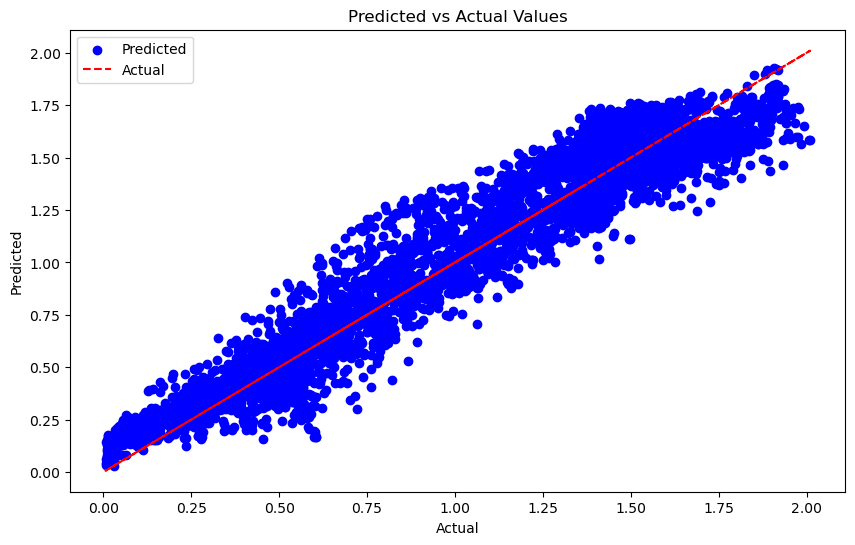

In [64]:
# Plot predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_nn, color='blue', label='Predicted', alpha=1)  # Predicted values
plt.plot(y_test, y_test, color='red', linestyle='--', label='Actual')  # Actual values
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.show()


# **Train and Test R2 and MSE values**

In [65]:
import pandas as pd

# Creating the DataFrame
data = {
    'Model': ['Stacking', 'xGBoost', 'SVR', 'GBM', 'CatBoost', 'Neural Network'],
    'Train_R2': [st_train_r2, xgb_train_r2, train_r2_svr, train_r2_gbm, train_r2_catboost, train_r2_nn],
    'Test_R2': [st_test_r2, xgb_r2, r2_svr, r2_gbm, r2_catboost, r2_nn],
    'Train_MSE': [st_train_mse, xgb_train_mse, train_mse_svr, train_mse_gbm, train_mse_catboost, train_mse_nn],
    'Test_MSE': [st_test_mse, xgb_mse, mse_svr, mse_gbm, mse_catboost, mse_nn]
}

evaluation_results_df = pd.DataFrame(data)

# Display the DataFrame
print(evaluation_results_df)



            Model  Train_R2   Test_R2  Train_MSE  Test_MSE
0        Stacking  0.975256  0.967233   0.006580  0.008783
1         xGBoost  0.993203  0.983025   0.001807  0.004550
2             SVR  0.945717  0.944353   0.014434  0.014915
3             GBM  0.991597  0.982543   0.002234  0.004679
4        CatBoost  0.998651  0.988678   0.000359  0.003035
5  Neural Network  0.916824  0.916049   0.022117  0.022502


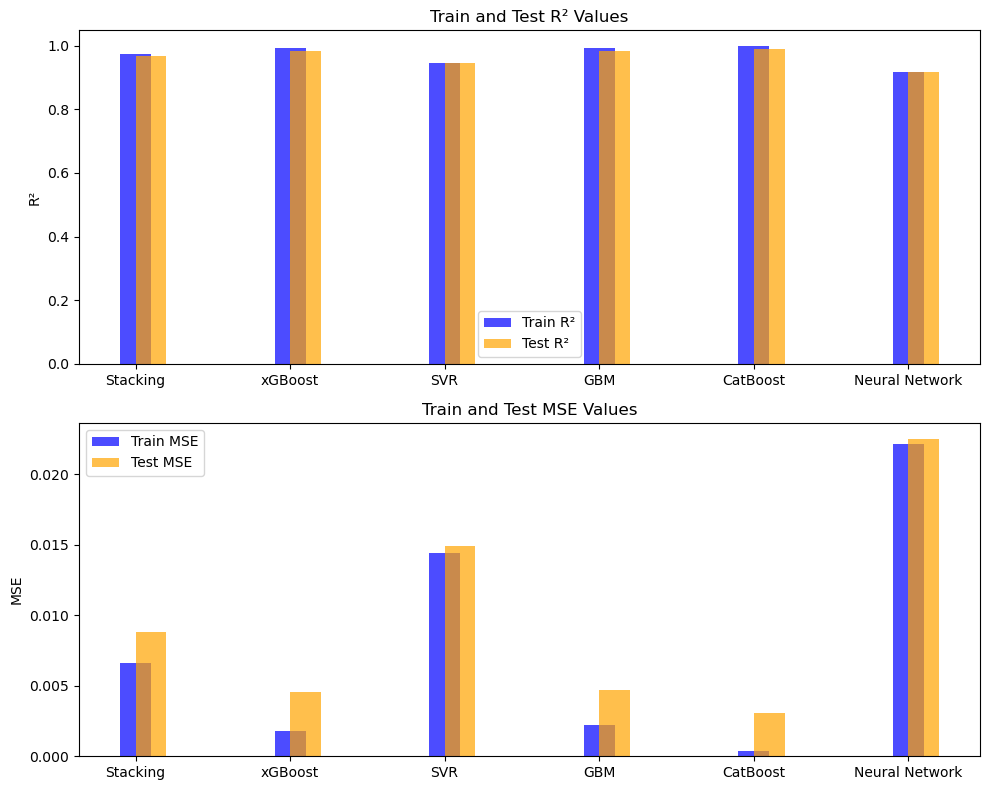

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract model names and metric values
models = evaluation_results_df['Model']
train_r2 = evaluation_results_df['Train_R2']
test_r2 = evaluation_results_df['Test_R2']
train_mse = evaluation_results_df['Train_MSE']
test_mse = evaluation_results_df['Test_MSE']

# Set up figure and axis
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Bar chart for R² values
axes[0].bar(models, train_r2, width=0.2, label='Train R²', color='blue', align='center', alpha=0.7)
axes[0].bar(models, test_r2, width=0.2, label='Test R²', color='orange', align='edge', alpha=0.7)
axes[0].set_title('Train and Test R² Values')
axes[0].set_ylabel('R²')
axes[0].legend()

# Bar chart for MSE values
axes[1].bar(models, train_mse, width=0.2, label='Train MSE', color='blue', align='center', alpha=0.7)
axes[1].bar(models, test_mse, width=0.2, label='Test MSE', color='orange', align='edge', alpha=0.7)
axes[1].set_title('Train and Test MSE Values')
axes[1].set_ylabel('MSE')
axes[1].legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()


# **Creation of .pkl files**

In [67]:
import joblib
import xgboost as xgb
from catboost import CatBoostRegressor
from tensorflow.keras.models import load_model

# Example: Save scikit-learn models using joblib
joblib.dump(svr_model, 'svr_model.pkl')
joblib.dump(gbm_model, 'gbm_model.pkl')

# Example: Save xgboost model
xgb_model.save_model('xgboost_model.pkl')

# Example: Save CatBoost model
catboost_model.save_model('catboost_model.pkl')

# Example: Save Keras model
final_model.save('final_model.keras')

# Example: Save model_stacking using joblib
joblib.dump(final_predictions, 'model_stacking.pkl')

print("Models saved successfully as .pkl files.")


Models saved successfully as .pkl files.


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:27:49] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


In [68]:
import numpy as np
import joblib
import xgboost as xgb
from catboost import CatBoostRegressor
from tensorflow.keras.models import load_model

# Load scikit-learn models using joblib
svr_model = joblib.load('svr_model.pkl')
gbm_model = joblib.load('gbm_model.pkl')

# Load xgboost model
xgb_model = xgb.Booster()
xgb_model.load_model('xgboost_model.pkl')

# Load CatBoost model
catboost_model = CatBoostRegressor()
catboost_model.load_model('catboost_model.pkl')

# Load Keras model
final_model = load_model('final_model.keras')

# Load model_stacking using joblib
model_stacking = joblib.load('model_stacking.pkl')

# **K Fold Cross Validation**

In [70]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from joblib import Parallel, delayed
import joblib
import xgboost as xgb
from catboost import CatBoostRegressor
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping

# Define function for non-neural model cross-validation with K-Fold
def evaluate_model_with_cv(model, X, y, cv_splits=5):
    mse_scores, r2_scores, mae_scores = [], [], []
    kf = KFold(n_splits=cv_splits, shuffle=True, random_state=42)

    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse_scores.append(mean_squared_error(y_test, y_pred))
        mae_scores.append(mean_absolute_error(y_test, y_pred))
        r2_scores.append(r2_score(y_test, y_pred))

    return {
        'cv_mean_mse': np.mean(mse_scores),
        'cv_std_mse': np.std(mse_scores),
        'cv_mean_mae': np.mean(mae_scores),
        'cv_std_mae': np.std(mae_scores),
        'cv_mean_r2': np.mean(r2_scores),
        'cv_std_r2': np.std(r2_scores)
    }

# Neural network cross-validation function with early stopping
def evaluate_nn_model(model, X, y, folds=5):
    kf = KFold(n_splits=folds, shuffle=True, random_state=42)
    mse_scores, mae_scores, r2_scores = [], [], []
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0, callbacks=[early_stopping], validation_split=0.1)
        y_pred = model.predict(X_test).flatten()
        mse_scores.append(mean_squared_error(y_test, y_pred))
        mae_scores.append(mean_absolute_error(y_test, y_pred))
        r2_scores.append(r2_score(y_test, y_pred))

    return {
        'cv_mean_mse': np.mean(mse_scores),
        'cv_std_mse': np.std(mse_scores),
        'cv_mean_mae': np.mean(mae_scores),
        'cv_std_mae': np.std(mae_scores),
        'cv_mean_r2': np.mean(r2_scores),
        'cv_std_r2': np.std(r2_scores)
    }

# Load dataset
dataset = pd.read_csv('new_data.csv')
X = dataset.drop('density', axis=1).values
y = dataset['density'].values
print("Dataset loaded successfully")

# Initialize models and load any saved weights
models = {
    'SVR': joblib.load('svr_model.pkl'),
    'GBM': joblib.load('gbm_model.pkl'),
    'XGBoost': xgb.XGBRegressor(),
    'CatBoost': CatBoostRegressor(),
    'Neural Network': load_model('final_model.keras'),
    # 'Stacking Model': joblib.load('model_stacking.pkl')
}

# Load additional model weights if available
models['XGBoost'].load_model('xgboost_model.pkl')
models['CatBoost'].load_model('catboost_model.pkl')
print("Models initialized and loaded successfully")

# Define cross-validation range
fold_values = range(5, 11)
results = {}
best_model = {'name': None, 'best_metric': float('inf'), 'fold': None, 'metrics': None}

# Evaluate models with cross-validation
for model_name, model in models.items():
    print(f"\nStarting cross-validation for model: {model_name}")
    results[model_name] = {}

    # Parallelize fold evaluations
    fold_results = Parallel(n_jobs=-1)(delayed(
        evaluate_nn_model if model_name == 'Neural Network' else evaluate_model_with_cv
    )(model, X, y, folds) for folds in fold_values)

    # Store and print fold results
    for fold_idx, folds in enumerate(fold_values):
        metrics = fold_results[fold_idx]
        results[model_name][f"{folds}_folds"] = metrics
        print(f"\nResults for {folds}-Fold CV of {model_name}:")
        for metric, value in metrics.items():
            print(f"  {metric}: {value:.4f}")

        # Update best model if this fold has a lower mean MSE
        if metrics['cv_mean_mse'] < best_model['best_metric']:
            print(f"Updating best model to {model_name} ({folds} folds) with MSE: {metrics['cv_mean_mse']:.4f}")
            best_model.update({
                'name': model_name,
                'best_metric': metrics['cv_mean_mse'],
                'fold': f"{folds}_folds",
                'metrics': metrics
            })

# Print the best model summary after all evaluations
if best_model['name'] is not None:
    print(f"\nBest Model: {best_model['name']} on {best_model['fold']}")
    print(f"Best Mean MSE: {best_model['best_metric']:.4f}")
    for metric, value in best_model['metrics'].items():
        print(f"  {metric}: {value:.4f}")
else:
    print("\nNo best model identified. Please verify the model update logic and fold results.")

# Print summary for all models and folds
for model_name, fold_metrics in results.items():
    print(f"\nSummary for {model_name}:")
    for fold, metrics in fold_metrics.items():
        print(f"\n{fold} Cross-Validation Metrics:")
        for metric, value in metrics.items():
            print(f"  {metric}: {value:.4f}")


Dataset loaded successfully
Models initialized and loaded successfully

Starting cross-validation for model: SVR

Results for 5-Fold CV of SVR:
  cv_mean_mse: 0.0146
  cv_std_mse: 0.0004
  cv_mean_mae: 0.0942
  cv_std_mae: 0.0012
  cv_mean_r2: 0.9453
  cv_std_r2: 0.0023
Updating best model to SVR (5 folds) with MSE: 0.0146

Results for 6-Fold CV of SVR:
  cv_mean_mse: 0.0145
  cv_std_mse: 0.0004
  cv_mean_mae: 0.0940
  cv_std_mae: 0.0011
  cv_mean_r2: 0.9455
  cv_std_r2: 0.0019
Updating best model to SVR (6 folds) with MSE: 0.0145

Results for 7-Fold CV of SVR:
  cv_mean_mse: 0.0145
  cv_std_mse: 0.0005
  cv_mean_mae: 0.0939
  cv_std_mae: 0.0014
  cv_mean_r2: 0.9456
  cv_std_r2: 0.0024
Updating best model to SVR (7 folds) with MSE: 0.0145

Results for 8-Fold CV of SVR:
  cv_mean_mse: 0.0145
  cv_std_mse: 0.0005
  cv_mean_mae: 0.0937
  cv_std_mae: 0.0014
  cv_mean_r2: 0.9457
  cv_std_r2: 0.0025
Updating best model to SVR (8 folds) with MSE: 0.0145

Results for 9-Fold CV of SVR:
  cv_mea

In [72]:
import joblib

# Initialize variables to track the best model
best_model_name = None
best_fold = None
best_metrics = None
best_mse = float('inf')  # Start with infinity so any model with a lower MSE will replace it
best_model_instance = None  # To store the actual best model instance

# Assume `models` is the dictionary of initialized models and `results` is filled with CV metrics
# Iterate over the results dictionary to find the model with the lowest mean MSE
for model_name, folds in results.items():
    for fold, metrics in folds.items():
        # Check if this fold's MSE is the best we've seen
        if metrics['cv_mean_mse'] < best_mse:
            best_mse = metrics['cv_mean_mse']
            best_model_name = model_name
            best_fold = fold
            best_metrics = metrics
            best_model_instance = models[model_name]  # Retrieve the actual model instance

# Print the best model's details
if best_model_name and best_metrics:
    print(f"\nBest Model: {best_model_name}")
    print(f"Best Fold: {best_fold}")
    for metric, value in best_metrics.items():
        print(f"  {metric}: {value:.4f}")
    
    # Save the best model to a .pkl file
    best_model_filename = f"best_model_{best_model_name}.pkl"
    joblib.dump(best_model_instance, best_model_filename)
    print(f"\nBest model saved as {best_model_filename}")
else:
    print("No best model found in the results.")



Best Model: CatBoost
Best Fold: 10_folds
  cv_mean_mse: 0.0030
  cv_std_mse: 0.0002
  cv_mean_mae: 0.0365
  cv_std_mae: 0.0010
  cv_mean_r2: 0.9888
  cv_std_r2: 0.0009

Best model saved as best_model_CatBoost.pkl


# **Recommendation**

Determining the optimal range for density

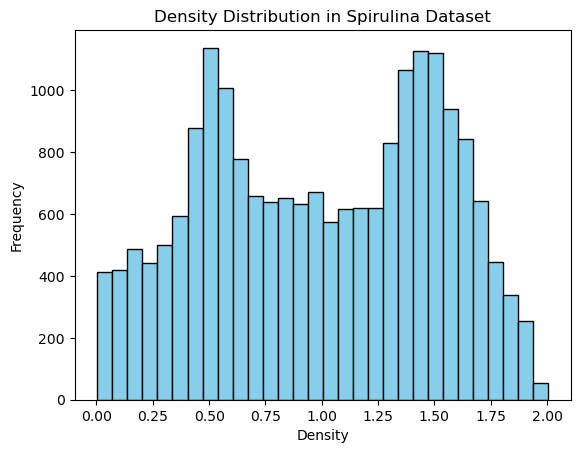

In [75]:
import matplotlib.pyplot as plt

# Plot the density distribution to get an idea of typical values
plt.hist(new_data['density'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Density')
plt.ylabel('Frequency')
plt.title('Density Distribution in Spirulina Dataset')
plt.show()


optimal threshold value of density using quartile

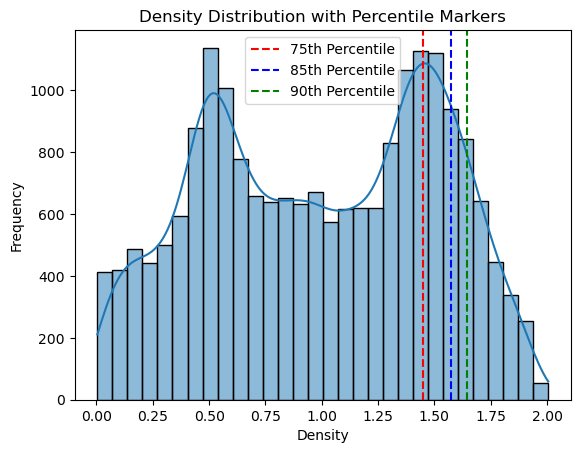

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(new_data['density'], bins=30, kde=True)
plt.axvline(new_data['density'].quantile(0.75), color='red', linestyle='--', label='75th Percentile')
plt.axvline(new_data['density'].quantile(0.85), color='blue', linestyle='--', label='85th Percentile')
plt.axvline(new_data['density'].quantile(0.90), color='green', linestyle='--', label='90th Percentile')
plt.xlabel('Density')
plt.ylabel('Frequency')
plt.title('Density Distribution with Percentile Markers')
plt.legend()
plt.show()


In [83]:
percentiles = [0.70, 0.75, 0.80, 0.85, 0.90]
thresholds = {f"{int(p*100)}th Percentile": new_data['density'].quantile(p) for p in percentiles}

for percentile, threshold in thresholds.items():
    print(f"{percentile} Threshold: {threshold:.4f}")


70th Percentile Threshold: 1.3918
75th Percentile Threshold: 1.4506
80th Percentile Threshold: 1.5060
85th Percentile Threshold: 1.5745
90th Percentile Threshold: 1.6466


In [ ]:
import pandas as pd
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np

# Load and preprocess your dataset
new_data = pd.read_csv("new_data.csv")
X = new_data.drop(columns=['density'])
y = new_data['density']

# Train the Random Forest model if not pre-trained
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Load the best model identified from cross-validation
try:
    best_model = joblib.load("best_model_CatBoost.pkl")
    print("Best model loaded successfully.")
except FileNotFoundError:
    print("Best model file not found. Using only Random Forest model.")
    best_model = None

# Calculate the optimal threshold for density (using 75th percentile as an example)
optimal_density_threshold = y.quantile(0.75)
print(f"Optimal Density Threshold (75th Percentile): {optimal_density_threshold:.4f}")

# Function to make ensemble predictions
def ensemble_predictions(models, X, weights=None):
    predictions = []
    for model in models:
        if model is not None:
            predictions.append(model.predict(X))
    
    # Weighted average if weights are provided, else simple average
    if weights and len(weights) == len(predictions):
        weighted_preds = sum(w * pred for w, pred in zip(weights, predictions))
        return weighted_preds / sum(weights)
    else:
        return sum(predictions) / len(predictions)

# Make predictions with the ensemble (Random Forest and best model if available)
models = [rf_model]
if best_model is not None:
    models.append(best_model)

# Define weights (optional, based on model performance; here we assume equal weighting)
weights = [0.5, 0.5] if best_model else [1.0]  # Adjust based on model performance

# Convert user_input to a DataFrame with a single row to match the model input format and order of X
user_input = {
    "temperature": 16.32,
    "irradiance": 0.0014,
    "ph": 9.48,
    "oxygen": 304.0,
    "nitrate": 31.2709,
    "phosphate": 1.427857142857140,
    "chlorophyll": 0.0173,
    "salinity": 10.0
}
user_input_df = pd.DataFrame([user_input])

# Reorder user_input_df to match the column order of X
user_input_df = user_input_df[X.columns]

# Predict the density specifically for the user input using the ensemble
user_input_density = ensemble_predictions(models, user_input_df, weights)
print(f"Predicted Density for User Input: {user_input_density[0]:.4f}" if isinstance(user_input_density, np.ndarray) else f"Predicted Density for User Input: {user_input_density:.4f}")

# Check if the predicted density meets the optimal threshold
if user_input_density >= optimal_density_threshold:
    print("The predicted density is within the optimal range for Spirulina growth.")
else:
    print("The predicted density is below the optimal threshold. Consider adjustments for optimal growth.")

    # Calculate feature importance using Random Forest (or ensemble methods like XGBoost if applicable)
    feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

    # Filter optimal data for recommendations
    new_data['density'] = ensemble_predictions(models, X, weights)
    optimal_data = new_data[new_data['density'] >= optimal_density_threshold]

    # Function to recommend adjustments based on feature importance and optimal ranges
    def recommend_adjustments_with_importance(user_input, optimal_data, feature_importance):
        recommendations = {}
        for feature in feature_importance.index:
            optimal_min = optimal_data[feature].min()
            optimal_max = optimal_data[feature].max()
            value = user_input.get(feature, None)

            if value is not None:
                if value < optimal_min:
                    recommendations[feature] = f"Increase {feature} to be within the range {optimal_min:.2f} to {optimal_max:.2f}"
                elif value > optimal_max:
                    recommendations[feature] = f"Decrease {feature} to be within the range {optimal_min:.2f} to {optimal_max:.2f}"
                else:
                    recommendations[feature] = f"{feature} is within the optimal range."
            else:
                recommendations[feature] = f"{feature} value is missing in user input."
        return recommendations

    # Get recommendations
    recommendations = recommend_adjustments_with_importance(user_input, optimal_data, feature_importance)

    # Output the recommendations
    for feature, recommendation in recommendations.items():
        print(f"{feature}: {recommendation}")


Best model loaded successfully.
Optimal Density Threshold (85th Percentile): 1.5812
Predicted Density for User Input: 0.0086
The predicted density is below the optimal threshold. Consider adjustments for optimal growth.
chlorophyll: Increase chlorophyll to be within the range 4.04 to 8.04
ph: Increase ph to be within the range 9.77 to 10.41
nitrate: nitrate is within the optimal range.
salinity: salinity is within the optimal range.
temperature: temperature is within the optimal range.
oxygen: Increase oxygen to be within the range 384.32 to 873.00
phosphate: phosphate is within the optimal range.
irradiance: irradiance is within the optimal range.
